# Random Forest ÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô®

Êú¨notebookÂÆûÁé∞‰∫ÜÂü∫‰∫éRandom ForestÁöÑÊô∫ËÉΩÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô®Ôºå‰Ωú‰∏∫SeekerÈ°πÁõÆ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÁöÑÂçáÁ∫ßÊñπÊ°à„ÄÇ

## Êû∂ÊûÑ
![](../slides/assets/diagram-random-forest-scorer-1.png)

## üéØ Ê†∏ÂøÉ‰ºòÂäø

**vs ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÂØπÊØîÔºö**
- ‚úÖ **Ëá™Âä®ÊùÉÈáçÂ≠¶‰π†**: Êó†ÈúÄÊâãÂ∑•Ë∞ÉÂèÇÔºå‰ªéÊï∞ÊçÆ‰∏≠Â≠¶‰π†ÊúÄ‰ºòÊùÉÈáç
- ‚úÖ **ÁâπÂæÅ‰∫§‰∫íÂª∫Ê®°**: ËÉΩÊçïËé∑ÁÆóÊ≥ïÈó¥ÁöÑÂ§çÊùÇ‰∫§‰∫íÂÖ≥Á≥ª  
- ‚úÖ **ÂèØËß£ÈáäÊÄß**: ÂèØËæìÂá∫ÁâπÂæÅÈáçË¶ÅÊÄßÔºå‰∫ÜËß£ÂêÑÁÆóÊ≥ïË¥°ÁåÆÂ∫¶
- ‚úÖ **Ëá™ÈÄÇÂ∫îËÉΩÂäõ**: ÈÄöËøáËÆ≠ÁªÉÊåÅÁª≠ÊèêÂçáÊ£ÄÊµãÊïàÊûú

## üöÄ ÊäÄÊúØÊû∂ÊûÑ

```
Â§öÁÆóÊ≥ïÊ£ÄÊµã ‚Üí ÁâπÂæÅÂ∑•Á®ã ‚Üí Random Forest ‚Üí ÂºÇÂ∏∏ËØÑÂàÜ ‚Üí Êô∫ËÉΩÂàÜÁ∫ß
    ‚Üì           ‚Üì          ‚Üì         ‚Üì         ‚Üì
5ÁßçÁÆóÊ≥ïÁªìÊûú   Â¢ûÂº∫ÁâπÂæÅ    Ëá™Âä®Â≠¶‰π†    0-1Ê¶ÇÁéá   P0/P1/P2
Êó∂Â∫èÁâπÂæÅ     ‰∫§‰∫íÁâπÂæÅ    ÊùÉÈáç‰ºòÂåñ    ÁΩÆ‰ø°Âå∫Èó¥   ‰ºòÂÖàÁ∫ß
ÁªüËÆ°ÁâπÂæÅ     ÈÇªÂüüÁâπÂæÅ    ÁâπÂæÅÈáçË¶ÅÊÄß  ‰∏öÂä°ÊåáÊ†á   ËøêÁª¥ÂÜ≥Á≠ñ
```

## üìä ÂÆûÈ™åËÆæËÆ°

1. **ÁâπÂæÅÂ∑•Á®ãÁ≠ñÁï•**: Âü∫Á°ÄÁâπÂæÅ + Êó∂Â∫èÁâπÂæÅ + ‰∫§‰∫íÁâπÂæÅ
2. **Ê®°ÂûãËÆ≠ÁªÉÊñπÂºè**: ÂçäÁõëÁù£Â≠¶‰π† + ÂéÜÂè≤Êï∞ÊçÆÊ†áÊ≥®
3. **ÊÄßËÉΩËØÑ‰º∞ÊåáÊ†á**: ÂáÜÁ°ÆÁéá„ÄÅÂè¨ÂõûÁéá„ÄÅF1-score„ÄÅAUC
4. **ÂØπÊØîÂü∫Á∫ø**: ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª vs Random ForestËØÑÂàÜÂô®

In [12]:
# ============ ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì ============

# Âü∫Á°ÄÊï∞ÊçÆÂ§ÑÁêÜÂ∫ì
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Êú∫Âô®Â≠¶‰π†Â∫ì
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import sklearn

# Êó∂Èó¥Â∫èÂàóÂ§ÑÁêÜ
from datetime import datetime, timedelta
import platform

# ‰∏≠ÊñáÂ≠ó‰ΩìÈÖçÁΩÆ
def setup_chinese_font():
    """ÈÖçÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÊòæÁ§∫"""
    system = platform.system()
    
    if system == "Darwin":  # macOS
        chinese_fonts = ['PingFang SC', 'Hiragino Sans GB', 'STHeiti', 'Arial Unicode MS']
    elif system == "Windows":
        chinese_fonts = ['Microsoft YaHei', 'SimHei', 'SimSun', 'KaiTi']
    else:  # Linux
        chinese_fonts = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'Noto Sans CJK SC']
    
    for font in chinese_fonts:
        try:
            plt.rcParams['font.sans-serif'] = [font]
            plt.rcParams['axes.unicode_minus'] = False
            print(f"‚úÖ ÊàêÂäüËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì: {font}")
            return True
        except:
            continue
    
    print("‚ö†Ô∏è Êú™ÊâæÂà∞ÂêàÈÄÇÁöÑ‰∏≠ÊñáÂ≠ó‰ΩìÔºåÂ∞Ü‰ΩøÁî®ÈªòËÆ§Â≠ó‰Ωì")
    plt.rcParams['axes.unicode_minus'] = False
    return False

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåÂõæË°®Ê†∑Âºè
setup_chinese_font()
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("‚úÖ Â∫ìÂØºÂÖ•ÂÆåÊàê")
print(f"üìä PythonÁâàÊú¨: {sys.version}")
print(f"üî¨ Scikit-learnÁâàÊú¨: {sklearn.__version__}")

‚úÖ ÊàêÂäüËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì: PingFang SC
‚úÖ Â∫ìÂØºÂÖ•ÂÆåÊàê
üìä PythonÁâàÊú¨: 3.13.2 (main, Feb  4 2025, 14:51:09) [Clang 16.0.0 (clang-1600.0.26.6)]
üî¨ Scikit-learnÁâàÊú¨: 1.6.1


In [13]:
# ============ Êï∞ÊçÆÂä†ËΩΩ‰∏éÈ¢ÑÂ§ÑÁêÜ ============

def load_real_data():
    """Âä†ËΩΩÁúüÂÆûÁöÑAWS CPUÁõëÊéßÊï∞ÊçÆ"""
    try:
        # Êü•ÊâæÊúÄÊñ∞ÁöÑCPUÊï∞ÊçÆÊñá‰ª∂
        data_dir = '/Users/xiaoming.gao/mingo/codes/m1n9o/Seeker/data'
        data_files = [f for f in os.listdir(data_dir) if f.startswith('CPUUtilization_')]
        
        if not data_files:
            print("‚ùå Êú™ÊâæÂà∞AWSÊï∞ÊçÆÊñá‰ª∂ÔºåÂ∞ÜÁîüÊàêÊµãËØïÊï∞ÊçÆ")
            return None
        
        latest_file = max(data_files, key=lambda x: os.path.getctime(os.path.join(data_dir, x)))
        data_path = os.path.join(data_dir, latest_file)
        
        print(f"üìÅ Âä†ËΩΩÊï∞ÊçÆÊñá‰ª∂: {latest_file}")
        df = pd.read_csv(data_path)
        
        # Â§ÑÁêÜÊó∂Èó¥Êà≥
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
        
        print(f"‚úÖ ÊàêÂäüÂä†ËΩΩ {len(df)} Êù°ËÆ∞ÂΩï")
        print(f"üìä Êï∞ÊçÆÊ¶ÇÂÜµ:")
        print(f"   CPU‰ΩøÁî®ÁéáËåÉÂõ¥: {df['cpu_usage'].min():.2f}% - {df['cpu_usage'].max():.2f}%")
        print(f"   Âπ≥ÂùáCPU‰ΩøÁî®Áéá: {df['cpu_usage'].mean():.2f}%")
        print(f"   Ê†áÂáÜÂ∑Æ: {df['cpu_usage'].std():.2f}%")
        
        return df
        
    except Exception as e:
        print(f"‚ùå Âä†ËΩΩÊï∞ÊçÆÂ§±Ë¥•: {e}")
        return None

def generate_enhanced_test_data(n_points=2000):
    """ÁîüÊàêÂ¢ûÂº∫ÁâàÊµãËØïÊï∞ÊçÆÔºåÂåÖÂê´Êõ¥Â§öÂºÇÂ∏∏Ê®°Âºè
    
    Args:
        n_points: Êï∞ÊçÆÁÇπÊï∞Èáè
        
    Returns:
        DataFrame: ÂåÖÂê´cpu_usage„ÄÅtimestampÂíåground_truthÊ†áÁ≠æÁöÑÊµãËØïÊï∞ÊçÆ
    """
    print(f"üß™ ÁîüÊàêÂ¢ûÂº∫ÁâàÊµãËØïÊï∞ÊçÆ ({n_points} ‰∏™Êï∞ÊçÆÁÇπ)...")
    
    # ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰øùËØÅÁªìÊûúÂèØÈáçÁé∞
    np.random.seed(42)
    
    # ÁîüÊàêÊó∂Èó¥Â∫èÂàó
    timestamps = pd.date_range(start='2024-01-01', periods=n_points, freq='5T')
    
    # Âü∫Á°ÄÊ®°ÂºèÔºöÊõ¥Â§çÊùÇÁöÑÂë®ÊúüÊÄßÊ®°Âºè
    time_index = np.arange(n_points)
    
    # Êó•Âë®ÊúüÔºà24Â∞èÊó∂ = 288‰∏™5ÂàÜÈíüÈó¥ÈöîÔºâ
    daily_pattern = 20 + 25 * np.sin(2 * np.pi * time_index / 288)
    
    # Âë®Âë®ÊúüÔºà7Â§©Ôºâ
    weekly_pattern = 8 * np.sin(2 * np.pi * time_index / (288 * 7))
    
    # ÊúàË∂ãÂäøÔºàÊ®°Êãü‰∏öÂä°Â¢ûÈïøÔºâ
    monthly_trend = 5 * np.sin(2 * np.pi * time_index / (288 * 30)) + 0.001 * time_index
    
    # Âü∫Á°ÄÂô™Â£∞
    noise = np.random.normal(0, 3, n_points)
    
    # ÂêàÊàêÂü∫Á°ÄCPU‰ΩøÁî®Áéá
    cpu_usage = daily_pattern + weekly_pattern + monthly_trend + noise
    
    # ÂàùÂßãÂåñÊ†áÁ≠æÔºà0=Ê≠£Â∏∏Ôºå1=ÂºÇÂ∏∏Ôºâ
    ground_truth = np.zeros(n_points, dtype=int)
    anomaly_indices = []
    
    # 1. Â∞ñÂ≥∞ÂºÇÂ∏∏ÔºàÊ®°ÊãüCPUÁ™ÅÁÑ∂È£ôÂçáÔºâ
    spike_count = int(n_points * 0.025)  # 2.5%ÁöÑÂ∞ñÂ≥∞ÂºÇÂ∏∏
    spike_indices = np.random.choice(n_points, spike_count, replace=False)
    for idx in spike_indices:
        cpu_usage[idx] += np.random.uniform(35, 70)  # Â¢ûÂä†35-70%
        ground_truth[idx] = 1
        anomaly_indices.append(idx)
    
    # 2. ÊåÅÁª≠È´òË¥üËΩΩÂºÇÂ∏∏ÔºàÊ®°ÊãüÁ≥ªÁªüÊïÖÈöúÔºâ
    sustained_count = 3  # 3‰∏™ÊåÅÁª≠ÂºÇÂ∏∏ÊÆµ
    for _ in range(sustained_count):
        start_idx = np.random.randint(100, n_points - 200)
        duration = np.random.randint(15, 50)  # ÊåÅÁª≠15-50‰∏™Êó∂Èó¥ÁÇπ
        end_idx = min(start_idx + duration, n_points)
        
        for idx in range(start_idx, end_idx):
            cpu_usage[idx] += np.random.uniform(20, 50)  # Â¢ûÂä†20-50%
            ground_truth[idx] = 1
            if idx not in anomaly_indices:
                anomaly_indices.append(idx)
    
    # 3. ÂºÇÂ∏∏‰ΩéÂÄºÔºàÊ®°ÊãüÁ≥ªÁªüÂºÇÂ∏∏Á©∫Èó≤Ôºâ
    low_count = int(n_points * 0.015)  # 1.5%ÁöÑ‰ΩéÂÄºÂºÇÂ∏∏
    low_indices = np.random.choice(n_points, low_count, replace=False)
    for idx in low_indices:
        cpu_usage[idx] = max(0, cpu_usage[idx] - np.random.uniform(20, 35))
        ground_truth[idx] = 1
        if idx not in anomaly_indices:
            anomaly_indices.append(idx)
    
    # 4. Ê∏êÂèòÂºÇÂ∏∏ÔºàÊ®°ÊãüÁºìÊÖ¢ÁöÑÊÄßËÉΩ‰∏ãÈôçÔºâ
    gradual_count = 2  # 2‰∏™Ê∏êÂèòÂºÇÂ∏∏ÊÆµ
    for _ in range(gradual_count):
        start_idx = np.random.randint(200, n_points - 300)
        duration = np.random.randint(50, 100)  # ÊåÅÁª≠50-100‰∏™Êó∂Èó¥ÁÇπ
        end_idx = min(start_idx + duration, n_points)
        
        # Ê∏êÂèòÂ¢ûÂä†
        gradient = np.linspace(0, 30, end_idx - start_idx)
        for i, idx in enumerate(range(start_idx, end_idx)):
            cpu_usage[idx] += gradient[i] + np.random.normal(0, 2)
            if gradient[i] > 15:  # ÂêéÂçäÊÆµÊ†áËÆ∞‰∏∫ÂºÇÂ∏∏
                ground_truth[idx] = 1
                if idx not in anomaly_indices:
                    anomaly_indices.append(idx)
    
    # Á°Æ‰øùCPU‰ΩøÁî®ÁéáÂú®ÂêàÁêÜËåÉÂõ¥ÂÜÖ
    cpu_usage = np.clip(cpu_usage, 0, 100)
    
    # ÂàõÂª∫DataFrame
    df = pd.DataFrame({
        'timestamp': timestamps,
        'cpu_usage': cpu_usage,
        'ground_truth': ground_truth
    })
    
    print(f"‚úÖ Â¢ûÂº∫ÁâàÊµãËØïÊï∞ÊçÆÁîüÊàêÂÆåÊàê")
    print(f"üìä Êï∞ÊçÆÊ¶ÇÂÜµ:")
    print(f"   ÊÄªÂºÇÂ∏∏ÁÇπ: {ground_truth.sum()} ‰∏™ ({ground_truth.sum()/n_points*100:.1f}%)")
    print(f"   CPU‰ΩøÁî®ÁéáËåÉÂõ¥: {df['cpu_usage'].min():.2f}% - {df['cpu_usage'].max():.2f}%")
    print(f"   Âπ≥ÂùáCPU‰ΩøÁî®Áéá: {df['cpu_usage'].mean():.2f}%")
    print(f"   Ê†áÂáÜÂ∑Æ: {df['cpu_usage'].std():.2f}%")
    
    return df

# Âä†ËΩΩÊàñÁîüÊàêÊï∞ÊçÆ
print("üöÄ ÂáÜÂ§áÊï∞ÊçÆ...")
data = load_real_data()

if data is None:
    # ÁîüÊàêÂ¢ûÂº∫ÁâàÊµãËØïÊï∞ÊçÆÔºàÂåÖÂê´ground truthÊ†áÁ≠æÔºâ
    data = generate_enhanced_test_data(2000)
else:
    # ‰∏∫ÁúüÂÆûÊï∞ÊçÆÂàõÂª∫Ê®°ÊãüÊ†áÁ≠æÔºàÂü∫‰∫é‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÁöÑÁªìÊûúÔºâ
    print("üè∑Ô∏è ‰∏∫ÁúüÂÆûÊï∞ÊçÆÂàõÂª∫Ê†áÁ≠æ...")
    # ËøôÈáåÂèØ‰ª•‰ΩøÁî®ÂéÜÂè≤ÂëäË≠¶Êï∞ÊçÆÊàñ‰∏ìÂÆ∂Ê†áÊ≥®
    # ÊöÇÊó∂Âü∫‰∫éÁªüËÆ°ÊñπÊ≥ïÂàõÂª∫Ê®°ÊãüÊ†áÁ≠æ
    cpu_mean = data['cpu_usage'].mean()
    cpu_std = data['cpu_usage'].std()
    threshold = cpu_mean + 2.5 * cpu_std
    data['ground_truth'] = (data['cpu_usage'] > threshold).astype(int)
    
    # Ê£ÄÊü•Ê†áÁ≠æÂàÜÂ∏ÉÔºåÂ¶ÇÊûúÂºÇÂ∏∏Ê†∑Êú¨Â§™Â∞ëÔºåË∞ÉÊï¥ÈòàÂÄº
    anomaly_count = data['ground_truth'].sum()
    total_count = len(data)
    anomaly_rate = anomaly_count / total_count
    
    print(f"   ÂàùÂßãÂºÇÂ∏∏Áéá: {anomaly_rate:.3f} ({anomaly_count}/{total_count})")
    
    if anomaly_rate < 0.01:  # Â¶ÇÊûúÂºÇÂ∏∏Áéá‰Ωé‰∫é1%
        print("   ‚ö†Ô∏è ÂºÇÂ∏∏Ê†∑Êú¨ËøáÂ∞ëÔºåË∞ÉÊï¥ÈòàÂÄº...")
        threshold = cpu_mean + 2.0 * cpu_std  # Èôç‰ΩéÈòàÂÄº
        data['ground_truth'] = (data['cpu_usage'] > threshold).astype(int)
        
        anomaly_count = data['ground_truth'].sum()
        anomaly_rate = anomaly_count / total_count
        print(f"   Ë∞ÉÊï¥ÂêéÂºÇÂ∏∏Áéá: {anomaly_rate:.3f} ({anomaly_count}/{total_count})")
        
        if anomaly_rate < 0.005:  # Â¶ÇÊûúËøòÊòØÂ§™Â∞ë
            print("   ‚ö†Ô∏è ÁúüÂÆûÊï∞ÊçÆÂºÇÂ∏∏Ê†∑Êú¨‰ªçÁÑ∂ËøáÂ∞ëÔºåÂ∞ÜÁîüÊàêÊµãËØïÊï∞ÊçÆ")
            data = generate_enhanced_test_data(2000)

print(f"\n‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºåÂÖ± {len(data)} ‰∏™Êï∞ÊçÆÁÇπ")
print(f"üìä Ê†áÁ≠æÂàÜÂ∏É: Ê≠£Â∏∏ {(data['ground_truth']==0).sum()} ‰∏™, ÂºÇÂ∏∏ {(data['ground_truth']==1).sum()} ‰∏™")
data.head()

üöÄ ÂáÜÂ§áÊï∞ÊçÆ...
üìÅ Âä†ËΩΩÊï∞ÊçÆÊñá‰ª∂: CPUUtilization_i-00f458499ca38a3c7_20250704_183522.csv
‚úÖ ÊàêÂäüÂä†ËΩΩ 2016 Êù°ËÆ∞ÂΩï
üìä Êï∞ÊçÆÊ¶ÇÂÜµ:
   CPU‰ΩøÁî®ÁéáËåÉÂõ¥: 85.31% - 99.36%
   Âπ≥ÂùáCPU‰ΩøÁî®Áéá: 98.77%
   Ê†áÂáÜÂ∑Æ: 0.51%
üè∑Ô∏è ‰∏∫ÁúüÂÆûÊï∞ÊçÆÂàõÂª∫Ê†áÁ≠æ...
   ÂàùÂßãÂºÇÂ∏∏Áéá: 0.000 (0/2016)
   ‚ö†Ô∏è ÂºÇÂ∏∏Ê†∑Êú¨ËøáÂ∞ëÔºåË∞ÉÊï¥ÈòàÂÄº...
   Ë∞ÉÊï¥ÂêéÂºÇÂ∏∏Áéá: 0.000 (0/2016)
   ‚ö†Ô∏è ÁúüÂÆûÊï∞ÊçÆÂºÇÂ∏∏Ê†∑Êú¨‰ªçÁÑ∂ËøáÂ∞ëÔºåÂ∞ÜÁîüÊàêÊµãËØïÊï∞ÊçÆ
üß™ ÁîüÊàêÂ¢ûÂº∫ÁâàÊµãËØïÊï∞ÊçÆ (2000 ‰∏™Êï∞ÊçÆÁÇπ)...
‚úÖ Â¢ûÂº∫ÁâàÊµãËØïÊï∞ÊçÆÁîüÊàêÂÆåÊàê
üìä Êï∞ÊçÆÊ¶ÇÂÜµ:
   ÊÄªÂºÇÂ∏∏ÁÇπ: 251 ‰∏™ (12.6%)
   CPU‰ΩøÁî®ÁéáËåÉÂõ¥: 0.00% - 100.00%
   Âπ≥ÂùáCPU‰ΩøÁî®Áéá: 28.33%
   Ê†áÂáÜÂ∑Æ: 21.08%

‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºåÂÖ± 2000 ‰∏™Êï∞ÊçÆÁÇπ
üìä Ê†áÁ≠æÂàÜÂ∏É: Ê≠£Â∏∏ 1749 ‰∏™, ÂºÇÂ∏∏ 251 ‰∏™


timestamp  cpu_usage  ground_truth
0 2024-01-01 00:00:00  21.490142             0
1 2024-01-01 00:05:00  20.160149             0
2 2024-01-01 00:10:00  23.092689             0
3 2024-01-01 00:15:00  26.292875             0
4 2024-01-01 00:20:00  21.594708             0

In [14]:
# ============ Âü∫Á°ÄÂºÇÂ∏∏Ê£ÄÊµãÁÆóÊ≥ï ============
# ÈáçÁî®‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª‰∏≠ÁöÑÂü∫Á°ÄÁÆóÊ≥ï

def zscore_detection(data, threshold=3):
    """Z-scoreÂºÇÂ∏∏Ê£ÄÊµã"""
    data_array = np.array(data)
    mean = np.mean(data_array)
    std = np.std(data_array)
    if std == 0:
        return np.zeros(len(data), dtype=bool)
    z_scores = np.abs((data_array - mean) / std)
    return z_scores > threshold

def iqr_detection(data, k=1.5):
    """IQRÂºÇÂ∏∏Ê£ÄÊµã"""
    data_array = np.array(data)
    Q1 = np.percentile(data_array, 25)
    Q3 = np.percentile(data_array, 75)
    IQR = Q3 - Q1
    if IQR == 0:
        return np.zeros(len(data), dtype=bool)
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return (data_array < lower_bound) | (data_array > upper_bound)

def ewma_detection(data, span=15, threshold=2):
    """EWMAÂºÇÂ∏∏Ê£ÄÊµã"""
    if isinstance(data, pd.Series):
        data_series = data
    else:
        data_series = pd.Series(data)
    
    ewma_mean = data_series.ewm(span=span).mean()
    ewma_std = data_series.ewm(span=span).std()
    
    # Â§ÑÁêÜÊ†áÂáÜÂ∑Æ‰∏∫0ÁöÑÊÉÖÂÜµ
    ewma_std = ewma_std.fillna(1).replace(0, 1)
    
    deviations = np.abs((data_series - ewma_mean) / ewma_std)
    return deviations > threshold

def isolation_forest_detection(data, contamination=0.05):
    """Isolation ForestÂºÇÂ∏∏Ê£ÄÊµã"""
    model = IsolationForest(contamination=contamination, random_state=42)
    data_array = np.array(data)
    data_2d = data_array.reshape(-1, 1)
    return model.fit_predict(data_2d) == -1

def lof_detection(data, n_neighbors=20, contamination=0.05):
    """LOFÂºÇÂ∏∏Ê£ÄÊµã"""
    # Á°Æ‰øùÈÇªÂ±ÖÊï∞‰∏çË∂ÖËøáÊï∞ÊçÆÁÇπÊï∞
    n_neighbors = min(n_neighbors, len(data) - 1)
    if n_neighbors < 1:
        return np.zeros(len(data), dtype=bool)
    
    model = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    data_array = np.array(data)
    data_2d = data_array.reshape(-1, 1)
    return model.fit_predict(data_2d) == -1

def run_base_detections(df):
    """ËøêË°åÊâÄÊúâÂü∫Á°ÄÊ£ÄÊµãÁÆóÊ≥ï"""
    print("üîç ËøêË°åÂü∫Á°ÄÂºÇÂ∏∏Ê£ÄÊµãÁÆóÊ≥ï...")
    
    # ÁÆóÊ≥ïÂèÇÊï∞Ôºà‰ºòÂåñÂêéÁöÑÂèÇÊï∞Ôºâ
    zscore_threshold = 2.5
    iqr_k = 1.8
    ewma_span = 12
    ewma_threshold = 2.0
    iforest_contamination = 0.03
    lof_neighbors = min(20, len(df) - 1)
    lof_contamination = 0.03
    
    # ËøêË°åÂêÑÁßçÊ£ÄÊµãÁÆóÊ≥ï
    df['zscore_anomaly'] = zscore_detection(df['cpu_usage'], threshold=zscore_threshold)
    df['iqr_anomaly'] = iqr_detection(df['cpu_usage'], k=iqr_k)
    df['ewma_anomaly'] = ewma_detection(df['cpu_usage'], span=ewma_span, threshold=ewma_threshold)
    df['iforest_anomaly'] = isolation_forest_detection(df['cpu_usage'], contamination=iforest_contamination)
    df['lof_anomaly'] = lof_detection(df['cpu_usage'], n_neighbors=lof_neighbors, contamination=lof_contamination)
    
    # ÁªüËÆ°Âü∫Á°ÄÊ£ÄÊµãÁªìÊûú
    print("üìä Âü∫Á°ÄÊ£ÄÊµãÁªüËÆ°:")
    methods = ['zscore', 'iqr', 'ewma', 'iforest', 'lof']
    for method in methods:
        anomaly_count = df[f'{method}_anomaly'].sum()
        percentage = (anomaly_count / len(df)) * 100
        print(f"   {method.upper()}: {anomaly_count} ‰∏™ÂºÇÂ∏∏ÁÇπ ({percentage:.2f}%)")
    
    return df

# ËøêË°åÂü∫Á°ÄÊ£ÄÊµã
data_with_detections = run_base_detections(data.copy())
print("‚úÖ Âü∫Á°ÄÂºÇÂ∏∏Ê£ÄÊµãÂÆåÊàê")

üîç ËøêË°åÂü∫Á°ÄÂºÇÂ∏∏Ê£ÄÊµãÁÆóÊ≥ï...
üìä Âü∫Á°ÄÊ£ÄÊµãÁªüËÆ°:
   ZSCORE: 51 ‰∏™ÂºÇÂ∏∏ÁÇπ (2.55%)
   IQR: 10 ‰∏™ÂºÇÂ∏∏ÁÇπ (0.50%)
   EWMA: 41 ‰∏™ÂºÇÂ∏∏ÁÇπ (2.05%)
   IFOREST: 59 ‰∏™ÂºÇÂ∏∏ÁÇπ (2.95%)
   LOF: 60 ‰∏™ÂºÇÂ∏∏ÁÇπ (3.00%)
‚úÖ Âü∫Á°ÄÂºÇÂ∏∏Ê£ÄÊµãÂÆåÊàê


In [15]:
# ============ ÈîôËØØ‰øÆÂ§çÈ™åËØÅ ============
# ÈáçÊñ∞ËøêË°åÊï∞ÊçÆÂáÜÂ§áÔºåÊ£ÄÊü•Ê†áÁ≠æÂàÜÂ∏É

print("üîß È™åËØÅÊï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏É...")
print("="*50)

# Ê£ÄÊü•ÂΩìÂâçÊï∞ÊçÆÁöÑÊ†áÁ≠æÂàÜÂ∏É
if 'ground_truth' in data.columns:
    label_counts = data['ground_truth'].value_counts()
    normal_count = label_counts.get(0, 0)
    anomaly_count = label_counts.get(1, 0)
    total_count = len(data)
    
    print(f"üìä ÂΩìÂâçÊï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏É:")
    print(f"   Ê≠£Â∏∏Ê†∑Êú¨: {normal_count} ‰∏™ ({normal_count/total_count*100:.1f}%)")
    print(f"   ÂºÇÂ∏∏Ê†∑Êú¨: {anomaly_count} ‰∏™ ({anomaly_count/total_count*100:.1f}%)")
    print(f"   ÊÄªÊ†∑Êú¨Êï∞: {total_count} ‰∏™")
    
    if anomaly_count == 0:
        print("\n‚ö†Ô∏è ÂèëÁé∞ÈóÆÈ¢òÔºöÊ≤°ÊúâÂºÇÂ∏∏Ê†∑Êú¨ÔºÅ")
        print("üîß Ëß£ÂÜ≥ÊñπÊ°àÔºöÁîüÊàêÂåÖÂê´ÂºÇÂ∏∏ÁöÑÊµãËØïÊï∞ÊçÆ")
        
        # Âº∫Âà∂ÁîüÊàêÊµãËØïÊï∞ÊçÆ
        data = generate_enhanced_test_data(2000)
        
        # ÈáçÊñ∞Ê£ÄÊü•
        label_counts = data['ground_truth'].value_counts()
        normal_count = label_counts.get(0, 0)
        anomaly_count = label_counts.get(1, 0)
        total_count = len(data)
        
        print(f"\n‚úÖ ‰øÆÂ§çÂêéÁöÑÊï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏É:")
        print(f"   Ê≠£Â∏∏Ê†∑Êú¨: {normal_count} ‰∏™ ({normal_count/total_count*100:.1f}%)")
        print(f"   ÂºÇÂ∏∏Ê†∑Êú¨: {anomaly_count} ‰∏™ ({anomaly_count/total_count*100:.1f}%)")
        print(f"   ÊÄªÊ†∑Êú¨Êï∞: {total_count} ‰∏™")
    
    else:
        print("‚úÖ Êï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏ÉÊ≠£Â∏∏ÔºåÂèØ‰ª•ÁªßÁª≠ËÆ≠ÁªÉ")

else:
    print("‚ùå Êï∞ÊçÆ‰∏≠Áº∫Â∞ë ground_truth Ê†áÁ≠æÂàó")
    print("üîß ÈáçÊñ∞ÁîüÊàêÊµãËØïÊï∞ÊçÆ...")
    data = generate_enhanced_test_data(2000)

print("\n" + "="*50)
print("üéØ Êï∞ÊçÆÈ™åËØÅÂÆåÊàêÔºåÂáÜÂ§áÁªßÁª≠ÂêéÁª≠Ê≠•È™§...")

üîß È™åËØÅÊï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏É...
üìä ÂΩìÂâçÊï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏É:
   Ê≠£Â∏∏Ê†∑Êú¨: 1749 ‰∏™ (87.5%)
   ÂºÇÂ∏∏Ê†∑Êú¨: 251 ‰∏™ (12.6%)
   ÊÄªÊ†∑Êú¨Êï∞: 2000 ‰∏™
‚úÖ Êï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏ÉÊ≠£Â∏∏ÔºåÂèØ‰ª•ÁªßÁª≠ËÆ≠ÁªÉ

üéØ Êï∞ÊçÆÈ™åËØÅÂÆåÊàêÔºåÂáÜÂ§áÁªßÁª≠ÂêéÁª≠Ê≠•È™§...


In [16]:
# ============ ÁâπÂæÅÂ∑•Á®ã‰∏éÊûÑÈÄ† ============

class AdvancedFeatureEngineer:
    """È´òÁ∫ßÁâπÂæÅÂ∑•Á®ãÂô® - ‰∏∫Random ForestÊèê‰æõ‰∏∞ÂØåÁöÑÁâπÂæÅ"""
    
    def __init__(self, window_sizes=[3, 5, 10, 20]):
        """
        Args:
            window_sizes: ÊªëÂä®Á™óÂè£Â§ßÂ∞èÂàóË°®
        """
        self.window_sizes = window_sizes
        
    def create_basic_features(self, df):
        """ÂàõÂª∫Âü∫Á°ÄÁâπÂæÅ - Áõ¥Êé•Êù•Ëá™Âü∫Á°ÄÊ£ÄÊµãÁÆóÊ≥ï"""
        features_df = df.copy()
        
        print("üîß ÂàõÂª∫Âü∫Á°ÄÁâπÂæÅ...")
        
        # 1. Âü∫Á°ÄÁÆóÊ≥ïÊ£ÄÊµãÁªìÊûúÔºàËΩ¨‰∏∫Êï∞ÂÄºÔºâ
        features_df['zscore_result'] = features_df['zscore_anomaly'].astype(int)
        features_df['iqr_result'] = features_df['iqr_anomaly'].astype(int)
        features_df['ewma_result'] = features_df['ewma_anomaly'].astype(int)
        features_df['iforest_result'] = features_df['iforest_anomaly'].astype(int)
        features_df['lof_result'] = features_df['lof_anomaly'].astype(int)
        
        # 2. ÁÆóÊ≥ï‰∏ÄËá¥ÊÄßÁâπÂæÅ
        features_df['method_agreement'] = (
            features_df['zscore_result'] + 
            features_df['iqr_result'] + 
            features_df['ewma_result'] + 
            features_df['iforest_result'] + 
            features_df['lof_result']
        )
        
        # 3. ÂÅèÁ¶ªÁ®ãÂ∫¶ÁâπÂæÅ
        mean_cpu = features_df['cpu_usage'].mean()
        std_cpu = features_df['cpu_usage'].std()
        features_df['deviation_score'] = np.abs(features_df['cpu_usage'] - mean_cpu) / std_cpu
        features_df['zscore_abs'] = features_df['deviation_score']  # Âà´Âêç
        
        print(f"   ‚úÖ Âü∫Á°ÄÁâπÂæÅ: {8} ‰∏™")
        return features_df
    
    def create_time_series_features(self, df):
        """ÂàõÂª∫Êó∂Â∫èÁâπÂæÅ"""
        print("‚è∞ ÂàõÂª∫Êó∂Â∫èÁâπÂæÅ...")
        features_df = df.copy()
        
        feature_count = 0
        
        # 1. ÊªëÂä®Á™óÂè£ÁªüËÆ°ÁâπÂæÅ
        for window in self.window_sizes:
            # ÂùáÂÄº
            features_df[f'rolling_mean_{window}'] = features_df['cpu_usage'].rolling(window=window, center=True).mean()
            # Ê†áÂáÜÂ∑Æ
            features_df[f'rolling_std_{window}'] = features_df['cpu_usage'].rolling(window=window, center=True).std()
            # ÊúÄÂ§ßÂÄº
            features_df[f'rolling_max_{window}'] = features_df['cpu_usage'].rolling(window=window, center=True).max()
            # ÊúÄÂ∞èÂÄº
            features_df[f'rolling_min_{window}'] = features_df['cpu_usage'].rolling(window=window, center=True).min()
            # ÂèòÂåñÁéá
            features_df[f'rolling_change_{window}'] = features_df['cpu_usage'].rolling(window=window).apply(
                lambda x: (x.iloc[-1] - x.iloc[0]) / window if len(x) == window else 0
            )
            feature_count += 5
        
        # 2. ÊªûÂêéÁâπÂæÅ
        for lag in [1, 2, 3, 5, 10]:
            features_df[f'lag_{lag}'] = features_df['cpu_usage'].shift(lag)
            feature_count += 1
        
        # 3. Â∑ÆÂàÜÁâπÂæÅ
        features_df['diff_1'] = features_df['cpu_usage'].diff(1)
        features_df['diff_2'] = features_df['cpu_usage'].diff(2)
        features_df['diff_5'] = features_df['cpu_usage'].diff(5)
        feature_count += 3
        
        # 4. Ë∂ãÂäøÁâπÂæÅ
        for window in [10, 20]:
            # ÊñúÁéáÔºàÁ∫øÊÄßË∂ãÂäøÔºâ
            def calculate_slope(series):
                if len(series) < 2:
                    return 0
                x = np.arange(len(series))
                try:
                    slope = np.polyfit(x, series, 1)[0]
                    return slope
                except:
                    return 0
            
            features_df[f'trend_slope_{window}'] = features_df['cpu_usage'].rolling(window=window).apply(calculate_slope)
            feature_count += 1
        
        print(f"   ‚úÖ Êó∂Â∫èÁâπÂæÅ: {feature_count} ‰∏™")
        return features_df
    
    def create_interaction_features(self, df):
        """ÂàõÂª∫‰∫§‰∫íÁâπÂæÅ"""
        print("üîó ÂàõÂª∫‰∫§‰∫íÁâπÂæÅ...")
        features_df = df.copy()
        
        feature_count = 0
        
        # 1. ÁÆóÊ≥ïÁªìÊûúÁöÑ‰πòÁßØÁªÑÂêà
        algorithm_cols = ['zscore_result', 'iqr_result', 'ewma_result', 'iforest_result', 'lof_result']
        
        # ‰∏§‰∏§ÁªÑÂêà
        from itertools import combinations
        for col1, col2 in combinations(algorithm_cols, 2):
            features_df[f'{col1}_{col2}_product'] = features_df[col1] * features_df[col2]
            feature_count += 1
        
        # 2. Ê£ÄÊµãÁªìÊûú‰∏éÂÅèÁ¶ªÁ®ãÂ∫¶ÁöÑ‰∫§‰∫í
        features_df['iforest_deviation_product'] = features_df['iforest_result'] * features_df['deviation_score']
        features_df['agreement_deviation_product'] = features_df['method_agreement'] * features_df['deviation_score']
        feature_count += 2
        
        # 3. ÊåÅÁª≠ÊÄßÁâπÂæÅÔºàÊó∂Èó¥Áª¥Â∫¶ÁöÑÂºÇÂ∏∏ÂØÜÂ∫¶Ôºâ
        for window in [3, 5, 10]:
            # IForestÊ£ÄÊµãÁöÑÊåÅÁª≠ÊÄß
            features_df[f'iforest_persistence_{window}'] = (
                features_df['iforest_result']
                .rolling(window=window, center=True)
                .sum()
            )
            
            # ‰ªªÊÑèÁÆóÊ≥ïÊ£ÄÊµãÁöÑÊåÅÁª≠ÊÄß
            features_df[f'any_anomaly_persistence_{window}'] = (
                (features_df['method_agreement'] > 0).astype(int)
                .rolling(window=window, center=True)
                .sum()
            )
            feature_count += 2
        
        # 4. Áõ∏ÂØπ‰ΩçÁΩÆÁâπÂæÅ
        # Áõ∏ÂØπ‰∫éÂùáÂÄºÁöÑ‰ΩçÁΩÆ
        features_df['relative_position'] = (features_df['cpu_usage'] - features_df['cpu_usage'].mean()) / features_df['cpu_usage'].std()
        
        # Áõ∏ÂØπ‰∫éÂ±ÄÈÉ®ÂùáÂÄºÁöÑ‰ΩçÁΩÆ
        local_mean = features_df['cpu_usage'].rolling(window=50, center=True).mean()
        features_df['relative_to_local'] = features_df['cpu_usage'] - local_mean
        feature_count += 2
        
        print(f"   ‚úÖ ‰∫§‰∫íÁâπÂæÅ: {feature_count} ‰∏™")
        return features_df
    
    def create_all_features(self, df):
        """ÂàõÂª∫ÊâÄÊúâÁâπÂæÅ"""
        print("üöÄ ÂºÄÂßãÁâπÂæÅÂ∑•Á®ã...")
        print("="*50)
        
        # ÈÄêÊ≠•ÂàõÂª∫ÁâπÂæÅ
        df_features = self.create_basic_features(df)
        df_features = self.create_time_series_features(df_features)
        df_features = self.create_interaction_features(df_features)
        
        # Â°´ÂÖÖÁº∫Â§±ÂÄº
        print("üîß Â§ÑÁêÜÁº∫Â§±ÂÄº...")
        numeric_cols = df_features.select_dtypes(include=[np.number]).columns
        df_features[numeric_cols] = df_features[numeric_cols].fillna(method='ffill').fillna(method='bfill').fillna(0)
        
        # Ëé∑ÂèñÁâπÂæÅÂàóÔºàÊéíÈô§ÂéüÂßãÂàóÂíåÁõÆÊ†áÂàóÔºâ
        exclude_cols = ['timestamp', 'cpu_usage', 'ground_truth'] + [col for col in df_features.columns if col.endswith('_anomaly')]
        feature_cols = [col for col in df_features.columns if col not in exclude_cols]
        
        print("="*50)
        print(f"‚úÖ ÁâπÂæÅÂ∑•Á®ãÂÆåÊàêÔºÅÊÄªÂÖ±ÂàõÂª∫‰∫Ü {len(feature_cols)} ‰∏™ÁâπÂæÅ")
        print(f"üìä ÁâπÂæÅÂàóË°®:")
        for i, col in enumerate(feature_cols, 1):
            print(f"   {i:2d}. {col}")
        
        return df_features, feature_cols

# ÊâßË°åÁâπÂæÅÂ∑•Á®ã
feature_engineer = AdvancedFeatureEngineer()
data_with_features, feature_columns = feature_engineer.create_all_features(data_with_detections)

print(f"\nüìã Êï∞ÊçÆÂΩ¢Áä∂: {data_with_features.shape}")
print(f"üéØ ÁâπÂæÅÊï∞Èáè: {len(feature_columns)}")
print(f"üìä Ê†∑Êú¨ÂàÜÂ∏É: Ê≠£Â∏∏ {(data_with_features['ground_truth']==0).sum()} vs ÂºÇÂ∏∏ {(data_with_features['ground_truth']==1).sum()}")

# ÊòæÁ§∫ÁâπÂæÅÁªüËÆ°
print("\nüìà ÁâπÂæÅÁªüËÆ°‰ø°ÊÅØ:")
feature_stats = data_with_features[feature_columns].describe()
feature_stats.round(3)

üöÄ ÂºÄÂßãÁâπÂæÅÂ∑•Á®ã...
üîß ÂàõÂª∫Âü∫Á°ÄÁâπÂæÅ...
   ‚úÖ Âü∫Á°ÄÁâπÂæÅ: 8 ‰∏™
‚è∞ ÂàõÂª∫Êó∂Â∫èÁâπÂæÅ...
   ‚úÖ Êó∂Â∫èÁâπÂæÅ: 30 ‰∏™
üîó ÂàõÂª∫‰∫§‰∫íÁâπÂæÅ...
   ‚úÖ Êó∂Â∫èÁâπÂæÅ: 30 ‰∏™
üîó ÂàõÂª∫‰∫§‰∫íÁâπÂæÅ...
   ‚úÖ ‰∫§‰∫íÁâπÂæÅ: 20 ‰∏™
üîß Â§ÑÁêÜÁº∫Â§±ÂÄº...
‚úÖ ÁâπÂæÅÂ∑•Á®ãÂÆåÊàêÔºÅÊÄªÂÖ±ÂàõÂª∫‰∫Ü 58 ‰∏™ÁâπÂæÅ
üìä ÁâπÂæÅÂàóË°®:
    1. zscore_result
    2. iqr_result
    3. ewma_result
    4. iforest_result
    5. lof_result
    6. method_agreement
    7. deviation_score
    8. zscore_abs
    9. rolling_mean_3
   10. rolling_std_3
   11. rolling_max_3
   12. rolling_min_3
   13. rolling_change_3
   14. rolling_mean_5
   15. rolling_std_5
   16. rolling_max_5
   17. rolling_min_5
   18. rolling_change_5
   19. rolling_mean_10
   20. rolling_std_10
   21. rolling_max_10
   22. rolling_min_10
   23. rolling_change_10
   24. rolling_mean_20
   25. rolling_std_20
   26. rolling_max_20
   27. rolling_min_20
   28. rolling_change_20
   29. lag_1
   30. lag_2
   31. lag_3
   32. lag

zscore_result  iqr_result  ewma_result  iforest_result  lof_result  \
count       2000.000    2000.000     2000.000        2000.000    2000.000   
mean           0.026       0.005        0.020           0.030       0.030   
std            0.158       0.071        0.142           0.169       0.171   
min            0.000       0.000        0.000           0.000       0.000   
25%            0.000       0.000        0.000           0.000       0.000   
50%            0.000       0.000        0.000           0.000       0.000   
75%            0.000       0.000        0.000           0.000       0.000   
max            1.000       1.000        1.000           1.000       1.000   

       method_agreement  deviation_score  zscore_abs  rolling_mean_3  \
count          2000.000         2000.000    2000.000        2000.000   
mean              0.110            0.817       0.817          28.331   
std               0.484            0.576       0.576          19.795   
min               0.000            0.001       0.001           0.000   
25%               0.000            0.405       0.405          11.227   
50%               0.000            0.751       0.751          27.748   
75%               0.000            1.125       1.125          42.534   
max               5.000            3.400       3.400          95.826   

       rolling_std_3  ...  iforest_deviation_product  \
count       2000.000  ...                   2000.000   
mean           4.993  ...                      0.085   
std            7.326  ...                      0.488   
min            0.000  ...                      0.000   
25%            1.572  ...                      0.000   
50%            2.724  ...                      0.000   
75%            4.362  ...                      0.000   
max           42.618  ...                      3.400   

       agreement_deviation_product  iforest_persistence_3  \
count                     2000.000               2000.000   
mean                         0.256                  0.088   
std                          1.416                  0.382   
min                          0.000                  0.000   
25%                          0.000                  0.000   
50%                          0.000                  0.000   
75%                          0.000                  0.000   
max                         17.001                  3.000   

       any_anomaly_persistence_3  iforest_persistence_5  \
count                   2000.000               2000.000   
mean                       0.202                  0.148   
std                        0.487                  0.589   
min                        0.000                  0.000   
25%                        0.000                  0.000   
50%                        0.000                  0.000   
75%                        0.000                  0.000   
max                        3.000                  5.000   

       any_anomaly_persistence_5  iforest_persistence_10  \
count                   2000.000                2000.000   
mean                       0.338                   0.295   
std                        0.698                   1.095   
min                        0.000                   0.000   
25%                        0.000                   0.000   
50%                        0.000                   0.000   
75%                        1.000                   0.000   
max                        5.000                  10.000   

       any_anomaly_persistence_10  relative_position  relative_to_local  
count                    2000.000           2000.000           2000.000  
mean                        0.676              0.000             -0.048  
std                         1.182              1.000              9.595  
min                         0.000             -1.344            -32.522  
25%                         0.000             -0.855             -3.939  
50%                         0.000             -0.040             -0.931  
75%               

In [17]:
# ============ ËÆ≠ÁªÉÈõÜ‰∏éÊµãËØïÈõÜÂàíÂàÜ ============

def split_time_series_data(df, feature_cols, test_size=0.3, method='time_based'):
    """
    Êó∂Èó¥Â∫èÂàóÊï∞ÊçÆÂàíÂàÜ
    
    Args:
        df: ÂåÖÂê´ÁâπÂæÅÂíåÊ†áÁ≠æÁöÑDataFrame
        feature_cols: ÁâπÂæÅÂàóÂêçÂàóË°®
        test_size: ÊµãËØïÈõÜÊØî‰æã
        method: ÂàíÂàÜÊñπÊ≥ï ('time_based' Êàñ 'random')
    
    Returns:
        X_train, X_test, y_train, y_test, train_indices, test_indices
    """
    print(f"üìä Êï∞ÊçÆÈõÜÂàíÂàÜ (ÊñπÊ≥ï: {method}, ÊµãËØïÈõÜÊØî‰æã: {test_size})")
    
    # ÂáÜÂ§áÁâπÂæÅÂíåÊ†áÁ≠æ
    X = df[feature_cols].copy()
    y = df['ground_truth'].copy()
    
    if method == 'time_based':
        # Âü∫‰∫éÊó∂Èó¥ÁöÑÂàíÂàÜÔºàÂâç70%ËÆ≠ÁªÉÔºåÂêé30%ÊµãËØïÔºâ
        split_point = int(len(df) * (1 - test_size))
        
        train_indices = df.index[:split_point]
        test_indices = df.index[split_point:]
        
        X_train = X.loc[train_indices]
        X_test = X.loc[test_indices]
        y_train = y.loc[train_indices]
        y_test = y.loc[test_indices]
        
        print(f"   üìÖ Êó∂Èó¥ÂàíÂàÜ: ËÆ≠ÁªÉÈõÜ {len(train_indices)} Ê†∑Êú¨ (Ââç{(1-test_size)*100:.0f}%)")
        print(f"   üìÖ Êó∂Èó¥ÂàíÂàÜ: ÊµãËØïÈõÜ {len(test_indices)} Ê†∑Êú¨ (Âêé{test_size*100:.0f}%)")
        
    else:
        # ÈöèÊú∫ÂàíÂàÜ
        X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
            X, y, df.index, test_size=test_size, random_state=42, stratify=y
        )
        
        print(f"   üé≤ ÈöèÊú∫ÂàíÂàÜ: ËÆ≠ÁªÉÈõÜ {len(train_indices)} Ê†∑Êú¨")
        print(f"   üé≤ ÈöèÊú∫ÂàíÂàÜ: ÊµãËØïÈõÜ {len(test_indices)} Ê†∑Êú¨")
    
    # Ê£ÄÊü•Á±ªÂà´ÂàÜÂ∏É
    print(f"\nüìä ËÆ≠ÁªÉÈõÜÊ†áÁ≠æÂàÜÂ∏É:")
    train_counts = y_train.value_counts()
    for label, count in train_counts.items():
        percentage = count / len(y_train) * 100
        label_name = "Ê≠£Â∏∏" if label == 0 else "ÂºÇÂ∏∏"
        print(f"   {label_name}: {count} ‰∏™ ({percentage:.1f}%)")
    
    print(f"\nüìä ÊµãËØïÈõÜÊ†áÁ≠æÂàÜÂ∏É:")
    test_counts = y_test.value_counts()
    for label, count in test_counts.items():
        percentage = count / len(y_test) * 100
        label_name = "Ê≠£Â∏∏" if label == 0 else "ÂºÇÂ∏∏"
        print(f"   {label_name}: {count} ‰∏™ ({percentage:.1f}%)")
    
    return X_train, X_test, y_train, y_test, train_indices, test_indices

def handle_imbalanced_data(X_train, y_train, method='class_weight'):
    """
    Â§ÑÁêÜ‰∏çÂπ≥Ë°°Êï∞ÊçÆ
    
    Args:
        X_train: ËÆ≠ÁªÉÁâπÂæÅ
        y_train: ËÆ≠ÁªÉÊ†áÁ≠æ
        method: Â§ÑÁêÜÊñπÊ≥ï ('class_weight', 'smote', 'none')
    
    Returns:
        Â§ÑÁêÜÂêéÁöÑ X_train, y_train Âíå class_weight
    """
    print(f"‚öñÔ∏è Â§ÑÁêÜÊï∞ÊçÆ‰∏çÂπ≥Ë°° (ÊñπÊ≥ï: {method})")
    
    original_counts = y_train.value_counts()
    normal_count = original_counts.get(0, 0)
    anomaly_count = original_counts.get(1, 0)
    print(f"   ÂéüÂßãÂàÜÂ∏É: Ê≠£Â∏∏ {normal_count} vs ÂºÇÂ∏∏ {anomaly_count}")
    
    # Ê£ÄÊü•Êï∞ÊçÆÁöÑÊúâÊïàÊÄß
    if anomaly_count == 0:
        print("   ‚ö†Ô∏è Ë≠¶Âëä: ËÆ≠ÁªÉÈõÜ‰∏≠Ê≤°ÊúâÂºÇÂ∏∏Ê†∑Êú¨ÔºÅ")
        print("   üîß Âª∫ËÆÆ: Ê£ÄÊü•Êï∞ÊçÆÁîüÊàêÊàñÊ†áÊ≥®ËøáÁ®ã")
        # Â¶ÇÊûúÊ≤°ÊúâÂºÇÂ∏∏Ê†∑Êú¨ÔºåÊàë‰ª¨‰ªçÁÑ∂ËøîÂõûÂéüÂßãÊï∞ÊçÆÔºå‰ΩÜÁªôÂá∫Ë≠¶Âëä
        return X_train, y_train, None
    
    if normal_count == 0:
        print("   ‚ö†Ô∏è Ë≠¶Âëä: ËÆ≠ÁªÉÈõÜ‰∏≠Ê≤°ÊúâÊ≠£Â∏∏Ê†∑Êú¨ÔºÅ")
        return X_train, y_train, None
    
    if method == 'class_weight':
        # ‰ΩøÁî®Á±ªÂà´ÊùÉÈáçÂπ≥Ë°°
        class_weight = 'balanced'
        print(f"   ‚úÖ ‰ΩøÁî® balanced class_weight")
        return X_train, y_train, class_weight
    
    elif method == 'smote':
        # ‰ΩøÁî®SMOTEËøáÈááÊ†∑
        try:
            from imblearn.over_sampling import SMOTE
            smote = SMOTE(random_state=42)
            X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
            
            new_counts = pd.Series(y_train_balanced).value_counts()
            new_normal = new_counts.get(0, 0)
            new_anomaly = new_counts.get(1, 0)
            print(f"   ‚úÖ SMOTEÂêéÂàÜÂ∏É: Ê≠£Â∏∏ {new_normal} vs ÂºÇÂ∏∏ {new_anomaly}")
            
            return X_train_balanced, y_train_balanced, None
        except ImportError:
            print("   ‚ö†Ô∏è imblearnÊú™ÂÆâË£ÖÔºåÂõûÈÄÄÂà∞class_weightÊñπÊ≥ï")
            return X_train, y_train, 'balanced'
    
    else:
        # ‰∏çÂ§ÑÁêÜ
        print(f"   ‚ÑπÔ∏è ‰øùÊåÅÂéüÂßãÊï∞ÊçÆÂàÜÂ∏É")
        return X_train, y_train, None

# ÊâßË°åÊï∞ÊçÆÂàíÂàÜ
print("üîÑ ÂºÄÂßãÊï∞ÊçÆÈõÜÂàíÂàÜ...")
print("="*60)

# ÊñπÊ°à1: Âü∫‰∫éÊó∂Èó¥ÁöÑÂàíÂàÜÔºàÊé®ËçêÁî®‰∫éÊó∂Èó¥Â∫èÂàóÔºâ
X_train_time, X_test_time, y_train_time, y_test_time, train_idx_time, test_idx_time = split_time_series_data(
    data_with_features, feature_columns, test_size=0.3, method='time_based'
)

print("\n" + "="*60)

# ÊñπÊ°à2: ÈöèÊú∫ÂàíÂàÜÔºàÁî®‰∫éÂØπÊØîÔºâ
X_train_random, X_test_random, y_train_random, y_test_random, train_idx_random, test_idx_random = split_time_series_data(
    data_with_features, feature_columns, test_size=0.3, method='random'
)

print("\n" + "="*60)

# Â§ÑÁêÜÊï∞ÊçÆ‰∏çÂπ≥Ë°°Ôºà‰ΩøÁî®Êó∂Èó¥ÂàíÂàÜÁöÑÊï∞ÊçÆÔºâ
X_train_balanced, y_train_balanced, class_weight_setting = handle_imbalanced_data(
    X_train_time, y_train_time, method='class_weight'
)

print("\n‚úÖ Êï∞ÊçÆÈõÜÂàíÂàÜÂÆåÊàê")
print(f"üìä ÊúÄÁªàËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: {X_train_balanced.shape}")
print(f"üìä ÊúÄÁªàÊµãËØïÈõÜÂΩ¢Áä∂: {X_test_time.shape}")

# ÁâπÂæÅÊ†áÂáÜÂåñÔºàÂèØÈÄâÔºâ
print("\nüîß ÁâπÂæÅÊ†áÂáÜÂåñ...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_time)

# ËΩ¨ÂõûDataFrame‰øùÊåÅÂàóÂêç
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train_balanced.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test_time.index)

print(f"‚úÖ Ê†áÂáÜÂåñÂÆåÊàêÔºåÁâπÂæÅËåÉÂõ¥ÂΩí‰∏ÄÂåñÂà∞ÂùáÂÄº0„ÄÅÊ†áÂáÜÂ∑Æ1")

üîÑ ÂºÄÂßãÊï∞ÊçÆÈõÜÂàíÂàÜ...
üìä Êï∞ÊçÆÈõÜÂàíÂàÜ (ÊñπÊ≥ï: time_based, ÊµãËØïÈõÜÊØî‰æã: 0.3)
   üìÖ Êó∂Èó¥ÂàíÂàÜ: ËÆ≠ÁªÉÈõÜ 1400 Ê†∑Êú¨ (Ââç70%)
   üìÖ Êó∂Èó¥ÂàíÂàÜ: ÊµãËØïÈõÜ 600 Ê†∑Êú¨ (Âêé30%)

üìä ËÆ≠ÁªÉÈõÜÊ†áÁ≠æÂàÜÂ∏É:
   Ê≠£Â∏∏: 1252 ‰∏™ (89.4%)
   ÂºÇÂ∏∏: 148 ‰∏™ (10.6%)

üìä ÊµãËØïÈõÜÊ†áÁ≠æÂàÜÂ∏É:
   Ê≠£Â∏∏: 497 ‰∏™ (82.8%)
   ÂºÇÂ∏∏: 103 ‰∏™ (17.2%)

üìä Êï∞ÊçÆÈõÜÂàíÂàÜ (ÊñπÊ≥ï: random, ÊµãËØïÈõÜÊØî‰æã: 0.3)
   üé≤ ÈöèÊú∫ÂàíÂàÜ: ËÆ≠ÁªÉÈõÜ 1400 Ê†∑Êú¨
   üé≤ ÈöèÊú∫ÂàíÂàÜ: ÊµãËØïÈõÜ 600 Ê†∑Êú¨

üìä ËÆ≠ÁªÉÈõÜÊ†áÁ≠æÂàÜÂ∏É:
   Ê≠£Â∏∏: 1224 ‰∏™ (87.4%)
   ÂºÇÂ∏∏: 176 ‰∏™ (12.6%)

üìä ÊµãËØïÈõÜÊ†áÁ≠æÂàÜÂ∏É:
   Ê≠£Â∏∏: 525 ‰∏™ (87.5%)
   ÂºÇÂ∏∏: 75 ‰∏™ (12.5%)

‚öñÔ∏è Â§ÑÁêÜÊï∞ÊçÆ‰∏çÂπ≥Ë°° (ÊñπÊ≥ï: class_weight)
   ÂéüÂßãÂàÜÂ∏É: Ê≠£Â∏∏ 1252 vs ÂºÇÂ∏∏ 148
   ‚úÖ ‰ΩøÁî® balanced class_weight

‚úÖ Êï∞ÊçÆÈõÜÂàíÂàÜÂÆåÊàê
üìä ÊúÄÁªàËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: (1400, 58)
üìä ÊúÄÁªàÊµãËØïÈõÜÂΩ¢Áä∂: (600, 58)

üîß ÁâπÂæÅÊ†áÂáÜÂåñ...
‚úÖ Ê†áÂáÜÂåñÂÆåÊàêÔºåÁâπÂæÅËåÉÂõ¥ÂΩí‰∏ÄÂåñÂà∞ÂùáÂÄº0„ÄÅÊ†á

In [18]:
# ============ ËÆ≠ÁªÉRandom ForestÂºÇÂ∏∏Ê£ÄÊµãÊ®°Âûã ============

class RandomForestAnomalyScorer:
    """Random ForestÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô®"""
    
    def __init__(self):
        self.model = None
        self.feature_importance = None
        self.feature_names = None
        self.scaler = None
        
    def optimize_hyperparameters(self, X_train, y_train, cv_folds=5):
        """Ë∂ÖÂèÇÊï∞‰ºòÂåñ"""
        print("üîß ÂºÄÂßãË∂ÖÂèÇÊï∞‰ºòÂåñ...")
        
        # ÂèÇÊï∞ÁΩëÊ†º
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 15, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
        
        # ÁΩëÊ†ºÊêúÁ¥¢
        rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')
        grid_search = GridSearchCV(
            rf_base, 
            param_grid, 
            cv=cv_folds, 
            scoring='f1',  # ÈÄÇÂêà‰∏çÂπ≥Ë°°Êï∞ÊçÆ
            n_jobs=-1, 
            verbose=1
        )
        
        grid_search.fit(X_train, y_train)
        
        print(f"‚úÖ ÊúÄ‰Ω≥ÂèÇÊï∞: {grid_search.best_params_}")
        print(f"üìä ÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅF1ÂàÜÊï∞: {grid_search.best_score_:.4f}")
        
        return grid_search.best_estimator_
    
    def train_model(self, X_train, y_train, optimize=True, **kwargs):
        """ËÆ≠ÁªÉRandom ForestÊ®°Âûã"""
        print("üöÄ ÂºÄÂßãËÆ≠ÁªÉRandom ForestÊ®°Âûã...")
        print("="*50)
        
        self.feature_names = X_train.columns.tolist()
        
        if optimize:
            # Ë∂ÖÂèÇÊï∞‰ºòÂåñ
            self.model = self.optimize_hyperparameters(X_train, y_train)
        else:
            # ‰ΩøÁî®ÈªòËÆ§ÊàñÊåáÂÆöÂèÇÊï∞
            default_params = {
                'n_estimators': 200,
                'max_depth': 15,
                'min_samples_split': 5,
                'min_samples_leaf': 2,
                'max_features': 'sqrt',
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1
            }
            default_params.update(kwargs)
            
            print(f"üîß ‰ΩøÁî®ÂèÇÊï∞: {default_params}")
            self.model = RandomForestClassifier(**default_params)
            self.model.fit(X_train, y_train)
        
        # ËÆ°ÁÆóÁâπÂæÅÈáçË¶ÅÊÄß
        self.feature_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("‚úÖ Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàê")
        print(f"üìä Ê®°ÂûãÂèÇÊï∞: {self.model.get_params()}")
        
        return self.model
    
    def predict_anomaly_scores(self, X):
        """È¢ÑÊµãÂºÇÂ∏∏ÂàÜÊï∞"""
        if self.model is None:
            raise ValueError("Ê®°ÂûãÂ∞öÊú™ËÆ≠ÁªÉÔºåËØ∑ÂÖàË∞ÉÁî® train_model()")
        
        # È¢ÑÊµãÂºÇÂ∏∏Ê¶ÇÁéáÔºàÁ±ªÂà´1ÁöÑÊ¶ÇÁéá‰Ωú‰∏∫ÂºÇÂ∏∏ÂàÜÊï∞Ôºâ
        anomaly_proba = self.model.predict_proba(X)[:, 1]
        
        # È¢ÑÊµãÁ±ªÂà´
        anomaly_pred = self.model.predict(X)
        
        return anomaly_proba, anomaly_pred
    
    def get_feature_importance(self, top_n=20):
        """Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß"""
        if self.feature_importance is None:
            raise ValueError("ËØ∑ÂÖàËÆ≠ÁªÉÊ®°Âûã")
        
        return self.feature_importance.head(top_n)
    
    def print_model_summary(self):
        """ÊâìÂç∞Ê®°ÂûãÊëòË¶Å"""
        if self.model is None:
            print("‚ùå Ê®°ÂûãÂ∞öÊú™ËÆ≠ÁªÉ")
            return
        
        print("üìã Random ForestÊ®°ÂûãÊëòË¶Å")
        print("="*50)
        print(f"üå≥ ÂÜ≥Á≠ñÊ†ëÊï∞Èáè: {self.model.n_estimators}")
        print(f"üìè ÊúÄÂ§ßÊ∑±Â∫¶: {self.model.max_depth}")
        print(f"üçÉ ÊúÄÂ∞èÂè∂Â≠êÊ†∑Êú¨: {self.model.min_samples_leaf}")
        print(f"üîÄ ÊúÄÂ∞èÂàÜÂâ≤Ê†∑Êú¨: {self.model.min_samples_split}")
        print(f"üìä ÁâπÂæÅÊï∞Èáè: {len(self.feature_names)}")
        
        # ÊòæÁ§∫TopÁâπÂæÅÈáçË¶ÅÊÄß
        print(f"\nüîù Top 10 ÈáçË¶ÅÁâπÂæÅ:")
        for i, (_, row) in enumerate(self.feature_importance.head(10).iterrows(), 1):
            print(f"   {i:2d}. {row['feature']:<25} {row['importance']:.4f}")

# ÂàõÂª∫Âπ∂ËÆ≠ÁªÉÊ®°Âûã
print("üéØ ÂàõÂª∫Random ForestÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô®...")
rf_scorer = RandomForestAnomalyScorer()

# ÈÄâÊã©ÊòØÂê¶ËøõË°åË∂ÖÂèÇÊï∞‰ºòÂåñ
OPTIMIZE_HYPERPARAMS = False  # ËÆæ‰∏∫TrueÂêØÁî®Ë∂ÖÂèÇÊï∞‰ºòÂåñÔºàËæÉÊÖ¢Ôºâ

if OPTIMIZE_HYPERPARAMS:
    print("‚ö†Ô∏è Ë≠¶ÂëäÔºöË∂ÖÂèÇÊï∞‰ºòÂåñÂèØËÉΩÈúÄË¶ÅÂá†ÂàÜÈíüÊó∂Èó¥...")
    model = rf_scorer.train_model(X_train_scaled, y_train_balanced, optimize=True)
else:
    print("üöÄ ‰ΩøÁî®‰ºòÂåñÂêéÁöÑÈªòËÆ§ÂèÇÊï∞ËøõË°åÂø´ÈÄüËÆ≠ÁªÉ...")
    # ÁªèËøáÂÆûÈ™å‰ºòÂåñÁöÑÂèÇÊï∞
    optimized_params = {
        'n_estimators': 200,
        'max_depth': 15,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'max_features': 'sqrt',
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }
    model = rf_scorer.train_model(X_train_scaled, y_train_balanced, optimize=False, **optimized_params)

# ÊâìÂç∞Ê®°ÂûãÊëòË¶Å
rf_scorer.print_model_summary()

print(f"\n‚úÖ Random ForestÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàêÔºÅ")

üéØ ÂàõÂª∫Random ForestÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô®...
üöÄ ‰ΩøÁî®‰ºòÂåñÂêéÁöÑÈªòËÆ§ÂèÇÊï∞ËøõË°åÂø´ÈÄüËÆ≠ÁªÉ...
üöÄ ÂºÄÂßãËÆ≠ÁªÉRandom ForestÊ®°Âûã...
üîß ‰ΩøÁî®ÂèÇÊï∞: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1}
‚úÖ Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàê
üìä Ê®°ÂûãÂèÇÊï∞: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
üìã Random ForestÊ®°ÂûãÊëòË¶Å
üå≥ ÂÜ≥Á≠ñÊ†ëÊï∞Èáè: 200
üìè ÊúÄÂ§ßÊ∑±Â∫¶: 15
üçÉ ÊúÄÂ∞èÂè∂Â≠êÊ†∑Êú¨: 2
üîÄ ÊúÄÂ∞èÂàÜÂâ≤Ê†∑Êú¨: 5
üìä ÁâπÂæÅÊï∞Èáè: 58

üîù Top 10 ÈáçË¶ÅÁâπÂæÅ:
    1. rolling_std_3   

In [19]:
# ============ Ê®°ÂûãÈ¢ÑÊµã‰∏éËØÑÂàÜËæìÂá∫ ============

def evaluate_model_performance(y_true, y_pred, y_proba, model_name="Random Forest"):
    """ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ"""
    print(f"üìä {model_name} Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞")
    print("="*50)
    
    # ÂàÜÁ±ªÊä•Âëä
    print("üìã ÂàÜÁ±ªÊä•Âëä:")
    print(classification_report(y_true, y_pred, target_names=['Ê≠£Â∏∏', 'ÂºÇÂ∏∏']))
    
    # Ê∑∑Ê∑ÜÁü©Èòµ
    cm = confusion_matrix(y_true, y_pred)
    print("\nüîç Ê∑∑Ê∑ÜÁü©Èòµ:")
    print(f"                È¢ÑÊµã")
    print(f"ÂÆûÈôÖ    Ê≠£Â∏∏  ÂºÇÂ∏∏")
    print(f"Ê≠£Â∏∏    {cm[0,0]:4d}  {cm[0,1]:4d}")
    print(f"ÂºÇÂ∏∏    {cm[1,0]:4d}  {cm[1,1]:4d}")
    
    # AUCÂàÜÊï∞
    auc_score = roc_auc_score(y_true, y_proba)
    print(f"\nüéØ AUCÂàÜÊï∞: {auc_score:.4f}")
    
    # ÂÖ≥ÈîÆÊåáÊ†á
    precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
    recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nüìà ÂÖ≥ÈîÆÊåáÊ†á:")
    print(f"   Á≤æÁ°ÆÁéá (Precision): {precision:.4f}")
    print(f"   Âè¨ÂõûÁéá (Recall):    {recall:.4f}")
    print(f"   F1ÂàÜÊï∞:            {f1:.4f}")
    print(f"   AUC:              {auc_score:.4f}")
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc_score,
        'confusion_matrix': cm
    }

# Âú®ÊµãËØïÈõÜ‰∏äËøõË°åÈ¢ÑÊµã
print("üéØ Âú®ÊµãËØïÈõÜ‰∏äËøõË°åÈ¢ÑÊµã...")
print("="*60)

# Random ForestÈ¢ÑÊµã
rf_proba, rf_pred = rf_scorer.predict_anomaly_scores(X_test_scaled)

# ËØÑ‰º∞Random ForestÊÄßËÉΩ
rf_metrics = evaluate_model_performance(y_test_time, rf_pred, rf_proba, "Random Forest")

print("\n" + "="*60)

# ‰∏∫ÂØπÊØîÔºå‰πüÂú®ÊµãËØïÈõÜ‰∏äËøêË°å‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª
print("üîÑ ËøêË°å‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªËøõË°åÂØπÊØî...")

# Ëé∑ÂèñÊµãËØïÈõÜÁöÑ‰∏âÁª¥ËØÑÂàÜ
test_data = data_with_features.loc[test_idx_time].copy()

# ËÆ°ÁÆó‰∏âÁª¥ËØÑÂàÜÔºàÂ§çÂà∂‰πãÂâçÁöÑÈÄªËæëÔºâ
test_data['method_agreement'] = (
    test_data['zscore_result'] + test_data['iqr_result'] + 
    test_data['ewma_result'] + test_data['iforest_result'] + test_data['lof_result']
)

# ÂÅèÁ¶ªÁ®ãÂ∫¶ÂàÜÊï∞
mean_cpu = data_with_features['cpu_usage'].mean()
std_cpu = data_with_features['cpu_usage'].std()
test_data['deviation_score'] = np.abs(test_data['cpu_usage'] - mean_cpu) / std_cpu

# ÊåÅÁª≠ÊÄßÂàÜÊï∞
test_data['persistence_score'] = (
    test_data['iforest_result']
    .rolling(window=3, center=True)
    .sum()
    .fillna(0)
)

# ÁªºÂêàËØÑÂàÜ
consensus_weight = 0.4
deviation_weight = 0.4
persistence_weight = 0.2

test_data['three_dim_score'] = (
    consensus_weight * (test_data['method_agreement'] / 5) +
    deviation_weight * (test_data['deviation_score'] / test_data['deviation_score'].max()) +
    persistence_weight * (test_data['persistence_score'] / 3)
)

# ‰∏âÁª¥ËØÑÂàÜÁöÑÂºÇÂ∏∏Âà§Êñ≠Ôºà99%ÂàÜ‰ΩçÊï∞ÈòàÂÄºÔºâ
score_threshold = test_data['three_dim_score'].quantile(0.99)
three_dim_pred = (
    (test_data['iforest_result'] == 1) & 
    (
        (test_data['method_agreement'] >= 2) | 
        (test_data['three_dim_score'] > score_threshold)
    )
).astype(int)

# ËØÑ‰º∞‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÊÄßËÉΩ
three_dim_metrics = evaluate_model_performance(
    y_test_time, three_dim_pred, test_data['three_dim_score'], "‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª"
)

print("\n" + "="*60)
print("üèÜ Ê®°ÂûãÂØπÊØîÊÄªÁªì")
print("="*60)

metrics_comparison = pd.DataFrame({
    'Random Forest': [rf_metrics['precision'], rf_metrics['recall'], rf_metrics['f1'], rf_metrics['auc']],
    '‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª': [three_dim_metrics['precision'], three_dim_metrics['recall'], three_dim_metrics['f1'], three_dim_metrics['auc']]
}, index=['Á≤æÁ°ÆÁéá', 'Âè¨ÂõûÁéá', 'F1ÂàÜÊï∞', 'AUC'])

print(metrics_comparison.round(4))

# Á°ÆÂÆöÊõ¥‰ºòÁöÑÊ®°Âûã
rf_f1 = rf_metrics['f1']
three_dim_f1 = three_dim_metrics['f1']

if rf_f1 > three_dim_f1:
    improvement = ((rf_f1 - three_dim_f1) / three_dim_f1) * 100
    print(f"\nüéâ Random ForestË°®Áé∞Êõ¥‰ºòÔºÅ")
    print(f"   F1ÂàÜÊï∞ÊèêÂçá: {improvement:.1f}%")
else:
    decline = ((three_dim_f1 - rf_f1) / three_dim_f1) * 100
    print(f"\nüìä ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªË°®Áé∞Êõ¥‰ºò")
    print(f"   Random Forest F1ÂàÜÊï∞ËêΩÂêé: {decline:.1f}%")

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂà∞Êï∞ÊçÆ‰∏≠
test_results = test_data.copy()
test_results['rf_anomaly_score'] = rf_proba
test_results['rf_prediction'] = rf_pred
test_results['three_dim_prediction'] = three_dim_pred

print(f"\n‚úÖ È¢ÑÊµãÂÆåÊàêÔºÅÊµãËØïÈõÜÂÖ± {len(test_results)} ‰∏™Ê†∑Êú¨")

üéØ Âú®ÊµãËØïÈõÜ‰∏äËøõË°åÈ¢ÑÊµã...
üìä Random Forest Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞
üìã ÂàÜÁ±ªÊä•Âëä:
              precision    recall  f1-score   support

          Ê≠£Â∏∏       0.92      0.98      0.95       497
          ÂºÇÂ∏∏       0.89      0.60      0.72       103

    accuracy                           0.92       600
   macro avg       0.90      0.79      0.83       600
weighted avg       0.92      0.92      0.91       600


üîç Ê∑∑Ê∑ÜÁü©Èòµ:
                È¢ÑÊµã
ÂÆûÈôÖ    Ê≠£Â∏∏  ÂºÇÂ∏∏
Ê≠£Â∏∏     489     8
ÂºÇÂ∏∏      41    62

üéØ AUCÂàÜÊï∞: 0.8394

üìà ÂÖ≥ÈîÆÊåáÊ†á:
   Á≤æÁ°ÆÁéá (Precision): 0.8857
   Âè¨ÂõûÁéá (Recall):    0.6019
   F1ÂàÜÊï∞:            0.7168
   AUC:              0.8394

üîÑ ËøêË°å‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªËøõË°åÂØπÊØî...
üìä ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞
üìã ÂàÜÁ±ªÊä•Âëä:
              precision    recall  f1-score   support

          Ê≠£Â∏∏       0.86      1.00      0.92       497
          ÂºÇÂ∏∏       1.00      0.19      0.33       103

    accuracy 

In [20]:
# ============ ÂºÇÂ∏∏ÁÇπÁ≠õÈÄâ‰∏éÂàÜÁ∫ß ============

class AnomalyClassifier:
    """ÂºÇÂ∏∏ÁÇπÁ≠õÈÄâ‰∏éÊô∫ËÉΩÂàÜÁ∫ßÂô®"""
    
    def __init__(self, method='adaptive_threshold'):
        """
        Args:
            method: Á≠õÈÄâÊñπÊ≥ï ('fixed_threshold', 'percentile', 'adaptive_threshold')
        """
        self.method = method
        self.thresholds = {}
        
    def determine_thresholds(self, anomaly_scores, method='adaptive_threshold'):
        """Á°ÆÂÆöÂºÇÂ∏∏ÂàÜÁ∫ßÈòàÂÄº"""
        print(f"üéØ Á°ÆÂÆöÂºÇÂ∏∏Á≠õÈÄâÈòàÂÄº (ÊñπÊ≥ï: {method})")
        
        if method == 'fixed_threshold':
            # Âõ∫ÂÆöÈòàÂÄº
            self.thresholds = {
                'anomaly': 0.5,    # ÂºÇÂ∏∏Âà§Êñ≠ÈòàÂÄº
                'P0': 0.8,         # P0È´ò‰ºòÂÖàÁ∫ß
                'P1': 0.6,         # P1‰∏≠‰ºòÂÖàÁ∫ß
                'P2': 0.5          # P2‰Ωé‰ºòÂÖàÁ∫ß
            }
            
        elif method == 'percentile':
            # Âü∫‰∫éÂàÜ‰ΩçÊï∞
            self.thresholds = {
                'anomaly': np.percentile(anomaly_scores, 95),  # 95%ÂàÜ‰ΩçÊï∞
                'P0': np.percentile(anomaly_scores, 99),       # 99%ÂàÜ‰ΩçÊï∞
                'P1': np.percentile(anomaly_scores, 97),       # 97%ÂàÜ‰ΩçÊï∞
                'P2': np.percentile(anomaly_scores, 95)        # 95%ÂàÜ‰ΩçÊï∞
            }
            
        elif method == 'adaptive_threshold':
            # Ëá™ÈÄÇÂ∫îÈòàÂÄºÔºàÂü∫‰∫éÊï∞ÊçÆÂàÜÂ∏ÉÔºâ
            mean_score = np.mean(anomaly_scores)
            std_score = np.std(anomaly_scores)
            
            # Âä®ÊÄÅË∞ÉÊï¥Âü∫‰∫éÊï∞ÊçÆÂàÜÂ∏É
            self.thresholds = {
                'anomaly': mean_score + 2 * std_score,        # 2œÉÂéüÂàô
                'P0': mean_score + 3 * std_score,             # 3œÉ - ÊûÅÈ´òÂºÇÂ∏∏
                'P1': mean_score + 2.5 * std_score,           # 2.5œÉ - È´òÂºÇÂ∏∏
                'P2': mean_score + 2 * std_score              # 2œÉ - ‰∏≠Á≠âÂºÇÂ∏∏
            }
            
            # Á°Æ‰øùÈòàÂÄºÂú®ÂêàÁêÜËåÉÂõ¥ÂÜÖ
            self.thresholds = {k: max(0.5, min(1.0, v)) for k, v in self.thresholds.items()}
        
        print(f"   ‚úÖ ÈòàÂÄºËÆæÂÆö:")
        for key, value in self.thresholds.items():
            print(f"      {key}: {value:.3f}")
        
        return self.thresholds
    
    def classify_anomalies(self, anomaly_scores, confidence_scores=None):
        """
        ÂØπÂºÇÂ∏∏ËøõË°åÂàÜÁ±ªÂíåÂàÜÁ∫ß
        
        Args:
            anomaly_scores: ÂºÇÂ∏∏ËØÑÂàÜÊï∞ÁªÑ
            confidence_scores: ÁΩÆ‰ø°Â∫¶ËØÑÂàÜÔºàÂèØÈÄâÔºâ
        
        Returns:
            DataFrame: ÂåÖÂê´ÂàÜÁ±ªÁªìÊûúÁöÑÊï∞ÊçÆ
        """
        if not self.thresholds:
            self.determine_thresholds(anomaly_scores, self.method)
        
        print(f"üîç ÂºÄÂßãÂºÇÂ∏∏ÂàÜÁ±ª...")
        
        results = pd.DataFrame({
            'anomaly_score': anomaly_scores,
            'is_anomaly': anomaly_scores >= self.thresholds['anomaly'],
            'priority': 'Normal'
        })
        
        # ÂºÇÂ∏∏ÂàÜÁ∫ß
        anomaly_mask = results['is_anomaly']
        
        # P0: Á¥ßÊÄ•ÂºÇÂ∏∏
        p0_mask = anomaly_mask & (anomaly_scores >= self.thresholds['P0'])
        results.loc[p0_mask, 'priority'] = 'P0'
        
        # P1: ÈáçË¶ÅÂºÇÂ∏∏  
        p1_mask = anomaly_mask & (anomaly_scores >= self.thresholds['P1']) & (~p0_mask)
        results.loc[p1_mask, 'priority'] = 'P1'
        
        # P2: ‰∏ÄËà¨ÂºÇÂ∏∏
        p2_mask = anomaly_mask & (anomaly_scores >= self.thresholds['P2']) & (~p0_mask) & (~p1_mask)
        results.loc[p2_mask, 'priority'] = 'P2'
        
        # Ê∑ªÂä†ÁΩÆ‰ø°Â∫¶‰ø°ÊÅØ
        if confidence_scores is not None:
            results['confidence'] = confidence_scores
            results['high_confidence'] = confidence_scores > np.percentile(confidence_scores, 80)
        
        # ÁªüËÆ°ÁªìÊûú
        print(f"üìä ÂºÇÂ∏∏ÂàÜÁ±ªÁªüËÆ°:")
        priority_counts = results['priority'].value_counts()
        for priority, count in priority_counts.items():
            percentage = count / len(results) * 100
            if priority == 'Normal':
                print(f"   Ê≠£Â∏∏ÁÇπ: {count} ‰∏™ ({percentage:.1f}%)")
            else:
                print(f"   {priority}Á∫ßÂºÇÂ∏∏: {count} ‰∏™ ({percentage:.1f}%)")
        
        return results

def create_comprehensive_anomaly_report(test_data, rf_scores, rf_predictions, ground_truth):
    """ÂàõÂª∫ÁªºÂêàÂºÇÂ∏∏Ê£ÄÊµãÊä•Âëä"""
    print("üìã ÁîüÊàêÁªºÂêàÂºÇÂ∏∏Ê£ÄÊµãÊä•Âëä...")
    print("="*60)
    
    # ÂºÇÂ∏∏ÂàÜÁ±ª
    classifier = AnomalyClassifier(method='adaptive_threshold')
    anomaly_classification = classifier.classify_anomalies(rf_scores)
    
    # ÂêàÂπ∂ÊâÄÊúâ‰ø°ÊÅØ
    report_df = test_data[['timestamp', 'cpu_usage', 'ground_truth']].copy()
    report_df['rf_anomaly_score'] = rf_scores
    report_df['rf_prediction'] = rf_predictions
    report_df['rf_priority'] = anomaly_classification['priority']
    report_df['is_rf_anomaly'] = anomaly_classification['is_anomaly']
    
    # ËÆ°ÁÆóÂáÜÁ°ÆÊÄßÊåáÊ†á
    print("\nüéØ Random Forest ÂºÇÂ∏∏Ê£ÄÊµãÂáÜÁ°ÆÊÄß:")
    
    # ÊÄª‰ΩìÂáÜÁ°ÆÊÄß
    rf_accuracy = (rf_predictions == ground_truth).mean()
    print(f"   ÊÄª‰ΩìÂáÜÁ°ÆÁéá: {rf_accuracy:.3f}")
    
    # ÂºÇÂ∏∏Ê£ÄÊµãÂè¨ÂõûÁéá
    true_anomalies = ground_truth == 1
    detected_anomalies = rf_predictions == 1
    
    if true_anomalies.sum() > 0:
        recall = (true_anomalies & detected_anomalies).sum() / true_anomalies.sum()
        print(f"   ÂºÇÂ∏∏Âè¨ÂõûÁéá: {recall:.3f}")
    
    # Á≤æÁ°ÆÁéá
    if detected_anomalies.sum() > 0:
        precision = (true_anomalies & detected_anomalies).sum() / detected_anomalies.sum()
        print(f"   ÂºÇÂ∏∏Á≤æÁ°ÆÁéá: {precision:.3f}")
    
    # ‰ºòÂÖàÁ∫ßÂàÜÊûê
    print(f"\n‚ö° ‰ºòÂÖàÁ∫ßÂàÜÊûê:")
    for priority in ['P0', 'P1', 'P2']:
        priority_mask = report_df['rf_priority'] == priority
        if priority_mask.sum() > 0:
            priority_ground_truth = report_df[priority_mask]['ground_truth']
            accuracy = (priority_ground_truth == 1).mean()
            print(f"   {priority}Á∫ßÂºÇÂ∏∏ÂáÜÁ°ÆÁéá: {accuracy:.3f} ({priority_mask.sum()} ‰∏™Ê†∑Êú¨)")
    
    # ÂèëÁé∞È´òÈ£éÈô©ÂºÇÂ∏∏
    high_risk_anomalies = report_df[
        (report_df['rf_priority'].isin(['P0', 'P1'])) & 
        (report_df['rf_anomaly_score'] > 0.8)
    ]
    
    print(f"\nüö® È´òÈ£éÈô©ÂºÇÂ∏∏ÁÇπ: {len(high_risk_anomalies)} ‰∏™")
    if len(high_risk_anomalies) > 0:
        print("   Top 5 È´òÈ£éÈô©ÂºÇÂ∏∏:")
        top_high_risk = high_risk_anomalies.nlargest(5, 'rf_anomaly_score')
        for i, (idx, row) in enumerate(top_high_risk.iterrows(), 1):
            timestamp_str = row['timestamp'].strftime('%m-%d %H:%M') if 'timestamp' in row else f"ÁÇπ{idx}"
            print(f"   {i}. {timestamp_str} | CPU: {row['cpu_usage']:.1f}% | ËØÑÂàÜ: {row['rf_anomaly_score']:.3f} | Á∫ßÂà´: {row['rf_priority']}")
    
    return report_df, classifier

# ÊâßË°åÂºÇÂ∏∏Á≠õÈÄâ‰∏éÂàÜÁ∫ß
print("üéØ ÂºÄÂßãÂºÇÂ∏∏ÁÇπÁ≠õÈÄâ‰∏éÊô∫ËÉΩÂàÜÁ∫ß...")
print("="*60)

# ÂàõÂª∫ÁªºÂêàÊä•Âëä
anomaly_report, anomaly_classifier = create_comprehensive_anomaly_report(
    test_results, rf_proba, rf_pred, y_test_time
)

print("\n" + "="*60)
print("üìä Random Forest vs ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª - ÂºÇÂ∏∏ÂàÜÁ∫ßÂØπÊØî")
print("="*60)

# ÂØπÊØî‰∏§ÁßçÊñπÊ≥ïÁöÑÂºÇÂ∏∏ÂàÜÁ∫ßÁªìÊûú
rf_priority_counts = anomaly_report['rf_priority'].value_counts()
print("Random Forest ÂºÇÂ∏∏ÂàÜÁ∫ß:")
for priority, count in rf_priority_counts.items():
    percentage = count / len(anomaly_report) * 100
    print(f"   {priority}: {count} ‰∏™ ({percentage:.1f}%)")

# ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÁöÑÂàÜÁ∫ßÔºàÁÆÄÂåñÁâàÔºâ
three_dim_scores = test_results['three_dim_score']
three_dim_threshold = three_dim_scores.quantile(0.95)

three_dim_anomalies = three_dim_scores >= three_dim_threshold
print(f"\n‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÂºÇÂ∏∏ÂàÜÁ∫ß:")
print(f"   ÂºÇÂ∏∏: {three_dim_anomalies.sum()} ‰∏™ ({three_dim_anomalies.mean()*100:.1f}%)")
print(f"   Ê≠£Â∏∏: {(~three_dim_anomalies).sum()} ‰∏™ ({(~three_dim_anomalies).mean()*100:.1f}%)")

# ËÆ°ÁÆó‰∏§ÁßçÊñπÊ≥ïÁöÑ‰∏ÄËá¥ÊÄß
rf_anomalies = anomaly_report['is_rf_anomaly']
consistency = (rf_anomalies == three_dim_anomalies).mean()
print(f"\nüîó ‰∏§ÁßçÊñπÊ≥ï‰∏ÄËá¥ÊÄß: {consistency:.3f}")

print(f"\n‚úÖ ÂºÇÂ∏∏Á≠õÈÄâ‰∏éÂàÜÁ∫ßÂÆåÊàêÔºÅ")
print(f"üìä ÊúÄÁªàÊä•ÂëäÂåÖÂê´ {len(anomaly_report)} ‰∏™Ê†∑Êú¨")

# ÊòæÁ§∫ÂºÇÂ∏∏Êä•ÂëäÊ†∑‰æã
print(f"\nüìã ÂºÇÂ∏∏Êä•ÂëäÊ†∑‰æã (Ââç10Ë°å):")
display_cols = ['timestamp', 'cpu_usage', 'rf_anomaly_score', 'rf_priority', 'ground_truth']
if 'timestamp' in anomaly_report.columns:
    anomaly_report[display_cols].head(10)
else:
    display_cols_no_time = ['cpu_usage', 'rf_anomaly_score', 'rf_priority', 'ground_truth']
    anomaly_report[display_cols_no_time].head(10)

üéØ ÂºÄÂßãÂºÇÂ∏∏ÁÇπÁ≠õÈÄâ‰∏éÊô∫ËÉΩÂàÜÁ∫ß...
üìã ÁîüÊàêÁªºÂêàÂºÇÂ∏∏Ê£ÄÊµãÊä•Âëä...
üéØ Á°ÆÂÆöÂºÇÂ∏∏Á≠õÈÄâÈòàÂÄº (ÊñπÊ≥ï: adaptive_threshold)
   ‚úÖ ÈòàÂÄºËÆæÂÆö:
      anomaly: 0.698
      P0: 0.976
      P1: 0.837
      P2: 0.698
üîç ÂºÄÂßãÂºÇÂ∏∏ÂàÜÁ±ª...
üìä ÂºÇÂ∏∏ÂàÜÁ±ªÁªüËÆ°:
   Ê≠£Â∏∏ÁÇπ: 540 ‰∏™ (90.0%)
   P1Á∫ßÂºÇÂ∏∏: 36 ‰∏™ (6.0%)
   P0Á∫ßÂºÇÂ∏∏: 15 ‰∏™ (2.5%)
   P2Á∫ßÂºÇÂ∏∏: 9 ‰∏™ (1.5%)

üéØ Random Forest ÂºÇÂ∏∏Ê£ÄÊµãÂáÜÁ°ÆÊÄß:
   ÊÄª‰ΩìÂáÜÁ°ÆÁéá: 0.918
   ÂºÇÂ∏∏Âè¨ÂõûÁéá: 0.602
   ÂºÇÂ∏∏Á≤æÁ°ÆÁéá: 0.886

‚ö° ‰ºòÂÖàÁ∫ßÂàÜÊûê:

üö® È´òÈ£éÈô©ÂºÇÂ∏∏ÁÇπ: 0 ‰∏™

üìä Random Forest vs ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª - ÂºÇÂ∏∏ÂàÜÁ∫ßÂØπÊØî
Random Forest ÂºÇÂ∏∏ÂàÜÁ∫ß:

‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÂºÇÂ∏∏ÂàÜÁ∫ß:
   ÂºÇÂ∏∏: 30 ‰∏™ (5.0%)
   Ê≠£Â∏∏: 570 ‰∏™ (95.0%)

üîó ‰∏§ÁßçÊñπÊ≥ï‰∏ÄËá¥ÊÄß: 0.000

‚úÖ ÂºÇÂ∏∏Á≠õÈÄâ‰∏éÂàÜÁ∫ßÂÆåÊàêÔºÅ
üìä ÊúÄÁªàÊä•ÂëäÂåÖÂê´ 600 ‰∏™Ê†∑Êú¨

üìã ÂºÇÂ∏∏Êä•ÂëäÊ†∑‰æã (Ââç10Ë°å):


In [21]:
# ============ Ê£ÄÊµãÁªìÊûúÁªüËÆ°ÂàÜÊûê ============

def comprehensive_statistical_analysis(anomaly_report, rf_scorer):
    """comprehensive comprehensive statistical analysis of detection results"""
    print("üìä Random Forest ÂºÇÂ∏∏Ê£ÄÊµã - Ê∑±Â∫¶ÁªüËÆ°ÂàÜÊûê")
    print("="*80)
    
    # 1. Ê®°ÂûãÊÄßËÉΩËØ¶ÁªÜÂàÜÊûê
    print("üéØ 1. Ê®°ÂûãÊÄßËÉΩËØ¶ÁªÜÂàÜÊûê")
    print("-" * 40)
    
    # Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê
    from sklearn.metrics import confusion_matrix, classification_report
    cm = confusion_matrix(anomaly_report['ground_truth'], anomaly_report['rf_prediction'])
    
    print("Ê∑∑Ê∑ÜÁü©ÈòµËØ¶Ëß£:")
    print(f"   ÁúüÊ≠£‰æã(TP): {cm[1,1]} - Ê≠£Á°ÆËØÜÂà´ÁöÑÂºÇÂ∏∏")
    print(f"   ÂÅáÊ≠£‰æã(FP): {cm[0,1]} - ËØØÊä•ÁöÑÂºÇÂ∏∏") 
    print(f"   ÁúüË¥ü‰æã(TN): {cm[0,0]} - Ê≠£Á°ÆËØÜÂà´ÁöÑÊ≠£Â∏∏")
    print(f"   ÂÅáË¥ü‰æã(FN): {cm[1,0]} - ÊºèÊä•ÁöÑÂºÇÂ∏∏")
    
    # ‰∏öÂä°ÊåáÊ†áËÆ°ÁÆó
    tp, fp, tn, fn = cm[1,1], cm[0,1], cm[0,0], cm[1,0]
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # ÊïèÊÑüÊÄß/Âè¨ÂõûÁéá
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # ÁâπÂºÇÊÄß
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0          # Èò≥ÊÄßÈ¢ÑÊµãÂÄº/Á≤æÁ°ÆÁéá
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0          # Èò¥ÊÄßÈ¢ÑÊµãÂÄº
    
    print(f"\\nÂÖ≥ÈîÆ‰∏öÂä°ÊåáÊ†á:")
    print(f"   ÊïèÊÑüÊÄß (Âè¨ÂõûÁéá):    {sensitivity:.3f} - ÂèëÁé∞ÂºÇÂ∏∏ÁöÑËÉΩÂäõ")
    print(f"   ÁâπÂºÇÊÄß:           {specificity:.3f} - ÈÅøÂÖçËØØÊä•ÁöÑËÉΩÂäõ")
    print(f"   Èò≥ÊÄßÈ¢ÑÊµãÂÄº (Á≤æÁ°ÆÁéá): {ppv:.3f} - Êä•Ë≠¶ÁöÑÂèØ‰ø°Â∫¶")
    print(f"   Èò¥ÊÄßÈ¢ÑÊµãÂÄº:        {npv:.3f} - Ê≠£Â∏∏Âà§Êñ≠ÁöÑÂèØ‰ø°Â∫¶")
    
    # 2. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê
    print(f"\\nüîç 2. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê")
    print("-" * 40)
    
    feature_importance = rf_scorer.get_feature_importance(top_n=15)
    print("Top 15 ÊúÄÈáçË¶ÅÁâπÂæÅ:")
    for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
        importance_pct = row['importance'] * 100
        print(f"   {i:2d}. {row['feature']:<30} {importance_pct:6.2f}%")
    
    # ÁâπÂæÅÁ±ªÂûãÂàÜÊûê
    basic_features = [f for f in feature_importance['feature'] if f in ['zscore_result', 'iqr_result', 'ewma_result', 'iforest_result', 'lof_result']]
    time_features = [f for f in feature_importance['feature'] if 'rolling' in f or 'lag' in f or 'diff' in f]
    interaction_features = [f for f in feature_importance['feature'] if 'product' in f or 'persistence' in f]
    
    print(f"\\nÁâπÂæÅÁ±ªÂûãË¥°ÁåÆÂàÜÊûê:")
    total_importance = feature_importance['importance'].sum()
    
    basic_importance = feature_importance[feature_importance['feature'].isin(basic_features)]['importance'].sum()
    time_importance = feature_importance[feature_importance['feature'].isin(time_features)]['importance'].sum()
    interaction_importance = feature_importance[feature_importance['feature'].isin(interaction_features)]['importance'].sum()
    
    print(f"   Âü∫Á°ÄÁâπÂæÅË¥°ÁåÆ:  {basic_importance/total_importance*100:.1f}%")
    print(f"   Êó∂Â∫èÁâπÂæÅË¥°ÁåÆ:  {time_importance/total_importance*100:.1f}%")
    print(f"   ‰∫§‰∫íÁâπÂæÅË¥°ÁåÆ:  {interaction_importance/total_importance*100:.1f}%")
    
    # 3. ÂºÇÂ∏∏ÂàÜÂ∏ÉÂàÜÊûê
    print(f"\\nüìà 3. ÂºÇÂ∏∏ÂàÜÂ∏ÉÂàÜÊûê")
    print("-" * 40)
    
    # ËØÑÂàÜÂàÜÂ∏ÉÁªüËÆ°
    score_stats = anomaly_report['rf_anomaly_score'].describe()
    print("ÂºÇÂ∏∏ËØÑÂàÜÂàÜÂ∏ÉÁªüËÆ°:")
    print(f"   ÂùáÂÄº: {score_stats['mean']:.3f}")
    print(f"   Ê†áÂáÜÂ∑Æ: {score_stats['std']:.3f}")
    print(f"   ÊúÄÂ∞èÂÄº: {score_stats['min']:.3f}")
    print(f"   25%ÂàÜ‰ΩçÊï∞: {score_stats['25%']:.3f}")
    print(f"   50%ÂàÜ‰ΩçÊï∞: {score_stats['50%']:.3f}")
    print(f"   75%ÂàÜ‰ΩçÊï∞: {score_stats['75%']:.3f}")
    print(f"   ÊúÄÂ§ßÂÄº: {score_stats['max']:.3f}")
    
    # ‰∏çÂêå‰ºòÂÖàÁ∫ßÁöÑËØÑÂàÜËåÉÂõ¥
    print(f"\\nÂêÑ‰ºòÂÖàÁ∫ßÂºÇÂ∏∏ËØÑÂàÜËåÉÂõ¥:")
    for priority in ['P0', 'P1', 'P2']:
        priority_data = anomaly_report[anomaly_report['rf_priority'] == priority]
        if len(priority_data) > 0:
            scores = priority_data['rf_anomaly_score']
            print(f"   {priority}Á∫ß: {scores.min():.3f} - {scores.max():.3f} (ÂùáÂÄº: {scores.mean():.3f})")
    
    # 4. Êó∂Èó¥Ê®°ÂºèÂàÜÊûê
    if 'timestamp' in anomaly_report.columns:
        print(f"\\n‚è∞ 4. Êó∂Èó¥Ê®°ÂºèÂàÜÊûê")
        print("-" * 40)
        
        # ÊåâÊó∂Èó¥ÊÆµÂàÜÊûêÂºÇÂ∏∏ÂàÜÂ∏É
        anomaly_report['hour'] = anomaly_report['timestamp'].dt.hour
        hourly_anomalies = anomaly_report.groupby('hour')['is_rf_anomaly'].agg(['count', 'sum', 'mean'])
        hourly_anomalies['anomaly_rate'] = hourly_anomalies['mean'] * 100
        
        print("24Â∞èÊó∂ÂºÇÂ∏∏ÂàÜÂ∏É:")
        high_risk_hours = hourly_anomalies[hourly_anomalies['anomaly_rate'] > hourly_anomalies['anomaly_rate'].mean() + hourly_anomalies['anomaly_rate'].std()]
        
        if len(high_risk_hours) > 0:
            print("   È´òÈ£éÈô©Êó∂ÊÆµ:")
            for hour, row in high_risk_hours.iterrows():
                print(f"     {hour:2d}:00 - ÂºÇÂ∏∏Áéá {row['anomaly_rate']:.1f}% ({row['sum']}/{row['count']})")
    
    # 5. ËØØÂàÜÁ±ªÂàÜÊûê
    print(f"\\n‚ùå 5. ËØØÂàÜÁ±ªÂàÜÊûê")
    print("-" * 40)
    
    # ÂÅáÊ≠£‰æãÂàÜÊûê
    false_positives = anomaly_report[
        (anomaly_report['ground_truth'] == 0) & 
        (anomaly_report['rf_prediction'] == 1)
    ]
    
    if len(false_positives) > 0:
        fp_scores = false_positives['rf_anomaly_score']
        print(f"ÂÅáÊ≠£‰æã (ËØØÊä•) ÂàÜÊûê:")
        print(f"   Êï∞Èáè: {len(false_positives)}")
        print(f"   ËØÑÂàÜËåÉÂõ¥: {fp_scores.min():.3f} - {fp_scores.max():.3f}")
        print(f"   Âπ≥ÂùáËØÑÂàÜ: {fp_scores.mean():.3f}")
        
        # CPU‰ΩøÁî®ÁéáÂàÜÊûê
        fp_cpu = false_positives['cpu_usage']
        print(f"   CPU‰ΩøÁî®ÁéáËåÉÂõ¥: {fp_cpu.min():.1f}% - {fp_cpu.max():.1f}%")
    
    # ÂÅáË¥ü‰æãÂàÜÊûê
    false_negatives = anomaly_report[
        (anomaly_report['ground_truth'] == 1) & 
        (anomaly_report['rf_prediction'] == 0)
    ]
    
    if len(false_negatives) > 0:
        fn_scores = false_negatives['rf_anomaly_score']
        print(f"\\nÂÅáË¥ü‰æã (ÊºèÊä•) ÂàÜÊûê:")
        print(f"   Êï∞Èáè: {len(false_negatives)}")
        print(f"   ËØÑÂàÜËåÉÂõ¥: {fn_scores.min():.3f} - {fn_scores.max():.3f}")
        print(f"   Âπ≥ÂùáËØÑÂàÜ: {fn_scores.mean():.3f}")
        
        # CPU‰ΩøÁî®ÁéáÂàÜÊûê
        fn_cpu = false_negatives['cpu_usage']
        print(f"   CPU‰ΩøÁî®ÁéáËåÉÂõ¥: {fn_cpu.min():.1f}% - {fn_cpu.max():.1f}%")
    
    # 6. ÂïÜ‰∏ö‰ª∑ÂÄºËØÑ‰º∞
    print(f"\\nüí∞ 6. ÂïÜ‰∏ö‰ª∑ÂÄºËØÑ‰º∞")
    print("-" * 40)
    
    # ÂÅáËÆæÊàêÊú¨ÂèÇÊï∞
    cost_false_positive = 100    # ËØØÊä•ÊàêÊú¨Ôºà‰∫∫Â∑•È™åËØÅÊàêÊú¨Ôºâ
    cost_false_negative = 1000   # ÊºèÊä•ÊàêÊú¨ÔºàÁ≥ªÁªüÊïÖÈöúÊçüÂ§±Ôºâ
    cost_true_positive = 50      # Ê≠£Á°ÆÊ£ÄÊµãÊàêÊú¨ÔºàÂ§ÑÁêÜÊàêÊú¨Ôºâ
    
    total_cost = (fp * cost_false_positive + 
                 fn * cost_false_negative + 
                 tp * cost_true_positive)
    
    print(f"ÊàêÊú¨ÊïàÁõäÂàÜÊûê (ÂÅáËÆæÂÄº):")
    print(f"   ËØØÊä•ÊàêÊú¨: {fp} √ó {cost_false_positive} = {fp * cost_false_positive}")
    print(f"   ÊºèÊä•ÊàêÊú¨: {fn} √ó {cost_false_negative} = {fn * cost_false_negative}")
    print(f"   Â§ÑÁêÜÊàêÊú¨: {tp} √ó {cost_true_positive} = {tp * cost_true_positive}")
    print(f"   ÊÄªÊàêÊú¨: {total_cost}")
    
    # ‰∏éÂü∫Á∫øÊñπÊ≥ïÂØπÊØî
    baseline_fn = (anomaly_report['ground_truth'] == 1).sum()  # ÂÅáËÆæÂü∫Á∫øÊñπÊ≥ï‰∏çÊ£ÄÊµã‰ªª‰ΩïÂºÇÂ∏∏
    baseline_cost = baseline_fn * cost_false_negative
    cost_reduction = baseline_cost - total_cost
    
    print(f"\\nÁõ∏ÊØîÂü∫Á∫øÊñπÊ≥ï:")
    print(f"   Âü∫Á∫øÊàêÊú¨: {baseline_cost} (ÂÖ®ÈÉ®ÊºèÊä•)")
    print(f"   ÊàêÊú¨Èôç‰Ωé: {cost_reduction} ({cost_reduction/baseline_cost*100:.1f}%)")
    
    return {
        'confusion_matrix': cm,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'ppv': ppv,
        'npv': npv,
        'feature_importance': feature_importance,
        'cost_analysis': {
            'total_cost': total_cost,
            'cost_reduction': cost_reduction,
            'cost_reduction_pct': cost_reduction/baseline_cost*100
        }
    }

def compare_with_baseline_methods(anomaly_report, test_results):
    """‰∏éÂü∫Á∫øÊñπÊ≥ïÂØπÊØî"""
    print("\\nüèÅ ‰∏éÂü∫Á∫øÊñπÊ≥ïÊÄßËÉΩÂØπÊØî")
    print("="*60)
    
    # ÂáÜÂ§áÂØπÊØîÊï∞ÊçÆ
    methods_comparison = {}
    
    # Random Forest
    rf_tp = ((anomaly_report['ground_truth'] == 1) & (anomaly_report['rf_prediction'] == 1)).sum()
    rf_fp = ((anomaly_report['ground_truth'] == 0) & (anomaly_report['rf_prediction'] == 1)).sum()
    rf_fn = ((anomaly_report['ground_truth'] == 1) & (anomaly_report['rf_prediction'] == 0)).sum()
    rf_precision = rf_tp / (rf_tp + rf_fp) if (rf_tp + rf_fp) > 0 else 0
    rf_recall = rf_tp / (rf_tp + rf_fn) if (rf_tp + rf_fn) > 0 else 0
    rf_f1 = 2 * rf_precision * rf_recall / (rf_precision + rf_recall) if (rf_precision + rf_recall) > 0 else 0
    
    methods_comparison['Random Forest'] = {
        'precision': rf_precision,
        'recall': rf_recall,
        'f1': rf_f1
    }
    
    # ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª
    three_dim_tp = ((test_results['ground_truth'] == 1) & (test_results['three_dim_prediction'] == 1)).sum()
    three_dim_fp = ((test_results['ground_truth'] == 0) & (test_results['three_dim_prediction'] == 1)).sum()
    three_dim_fn = ((test_results['ground_truth'] == 1) & (test_results['three_dim_prediction'] == 0)).sum()
    three_dim_precision = three_dim_tp / (three_dim_tp + three_dim_fp) if (three_dim_tp + three_dim_fp) > 0 else 0
    three_dim_recall = three_dim_tp / (three_dim_tp + three_dim_fn) if (three_dim_tp + three_dim_fn) > 0 else 0
    three_dim_f1 = 2 * three_dim_precision * three_dim_recall / (three_dim_precision + three_dim_recall) if (three_dim_precision + three_dim_recall) > 0 else 0
    
    methods_comparison['‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª'] = {
        'precision': three_dim_precision,
        'recall': three_dim_recall,
        'f1': three_dim_f1
    }
    
    # Âçï‰∏ÄÁÆóÊ≥ïÂØπÊØî
    for method in ['iforest', 'zscore', 'iqr']:
        method_pred = test_results[f'{method}_result']
        method_tp = ((test_results['ground_truth'] == 1) & (method_pred == 1)).sum()
        method_fp = ((test_results['ground_truth'] == 0) & (method_pred == 1)).sum()
        method_fn = ((test_results['ground_truth'] == 1) & (method_pred == 0)).sum()
        
        method_precision = method_tp / (method_tp + method_fp) if (method_tp + method_fp) > 0 else 0
        method_recall = method_tp / (method_tp + method_fn) if (method_tp + method_fn) > 0 else 0
        method_f1 = 2 * method_precision * method_recall / (method_precision + method_recall) if (method_precision + method_recall) > 0 else 0
        
        methods_comparison[method.upper()] = {
            'precision': method_precision,
            'recall': method_recall,
            'f1': method_f1
        }
    
    # ÂàõÂª∫ÂØπÊØîË°®Ê†º
    comparison_df = pd.DataFrame(methods_comparison).T
    comparison_df = comparison_df.round(4)
    
    print("ÊñπÊ≥ïÊÄßËÉΩÂØπÊØî:")
    print(comparison_df)
    
    # ÊâæÂá∫ÊúÄ‰Ω≥ÊñπÊ≥ï
    best_f1_method = comparison_df['f1'].idxmax()
    best_f1_score = comparison_df['f1'].max()
    
    print(f"\\nüèÜ ÊúÄ‰Ω≥ÊñπÊ≥ï: {best_f1_method} (F1ÂàÜÊï∞: {best_f1_score:.4f})")
    
    # Random ForestÁöÑÊèêÂçáÂàÜÊûê
    if best_f1_method == 'Random Forest':
        second_best = comparison_df['f1'].nlargest(2).iloc[1]
        improvement = (best_f1_score - second_best) / second_best * 100
        print(f"üìà Random Forest Áõ∏ÊØîÁ¨¨‰∫åÂêçÊèêÂçá: {improvement:.1f}%")
    
    return comparison_df

# ÊâßË°åcomprehensive statistical analysis
print("üöÄ ÂºÄÂßãÊ∑±Â∫¶ÁªüËÆ°ÂàÜÊûê...")
analysis_results = comprehensive_statistical_analysis(anomaly_report, rf_scorer)

print("\\n" + "="*80)

# ÊñπÊ≥ïÂØπÊØî
comparison_results = compare_with_baseline_methods(anomaly_report, test_results)

print("\\n‚úÖ ÁªüËÆ°ÂàÜÊûêÂÆåÊàêÔºÅ")

üöÄ ÂºÄÂßãÊ∑±Â∫¶ÁªüËÆ°ÂàÜÊûê...
üìä Random Forest ÂºÇÂ∏∏Ê£ÄÊµã - Ê∑±Â∫¶ÁªüËÆ°ÂàÜÊûê
üéØ 1. Ê®°ÂûãÊÄßËÉΩËØ¶ÁªÜÂàÜÊûê
----------------------------------------
Ê∑∑Ê∑ÜÁü©ÈòµËØ¶Ëß£:
   ÁúüÊ≠£‰æã(TP): 62 - Ê≠£Á°ÆËØÜÂà´ÁöÑÂºÇÂ∏∏
   ÂÅáÊ≠£‰æã(FP): 8 - ËØØÊä•ÁöÑÂºÇÂ∏∏
   ÁúüË¥ü‰æã(TN): 489 - Ê≠£Á°ÆËØÜÂà´ÁöÑÊ≠£Â∏∏
   ÂÅáË¥ü‰æã(FN): 41 - ÊºèÊä•ÁöÑÂºÇÂ∏∏
\nÂÖ≥ÈîÆ‰∏öÂä°ÊåáÊ†á:
   ÊïèÊÑüÊÄß (Âè¨ÂõûÁéá):    0.602 - ÂèëÁé∞ÂºÇÂ∏∏ÁöÑËÉΩÂäõ
   ÁâπÂºÇÊÄß:           0.984 - ÈÅøÂÖçËØØÊä•ÁöÑËÉΩÂäõ
   Èò≥ÊÄßÈ¢ÑÊµãÂÄº (Á≤æÁ°ÆÁéá): 0.886 - Êä•Ë≠¶ÁöÑÂèØ‰ø°Â∫¶
   Èò¥ÊÄßÈ¢ÑÊµãÂÄº:        0.923 - Ê≠£Â∏∏Âà§Êñ≠ÁöÑÂèØ‰ø°Â∫¶
\nüîç 2. ÁâπÂæÅÈáçË¶ÅÊÄßÂàÜÊûê
----------------------------------------
Top 15 ÊúÄÈáçË¶ÅÁâπÂæÅ:
    1. rolling_std_3                    7.88%
    2. relative_to_local                7.53%
    3. rolling_std_20                   7.44%
    4. rolling_std_10                   7.12%
    5. rolling_std_5                    6.93%
    6. rolling_max_20                   6.79%
    7. deviation_score   

üöÄ ÂºÄÂßãÁîüÊàêRandom ForestÊ£ÄÊµãÁªìÊûúÂèØËßÜÂåñ...
üé® ÁîüÊàêRandom ForestÊ£ÄÊµãÁªìÊûúÂèØËßÜÂåñ...


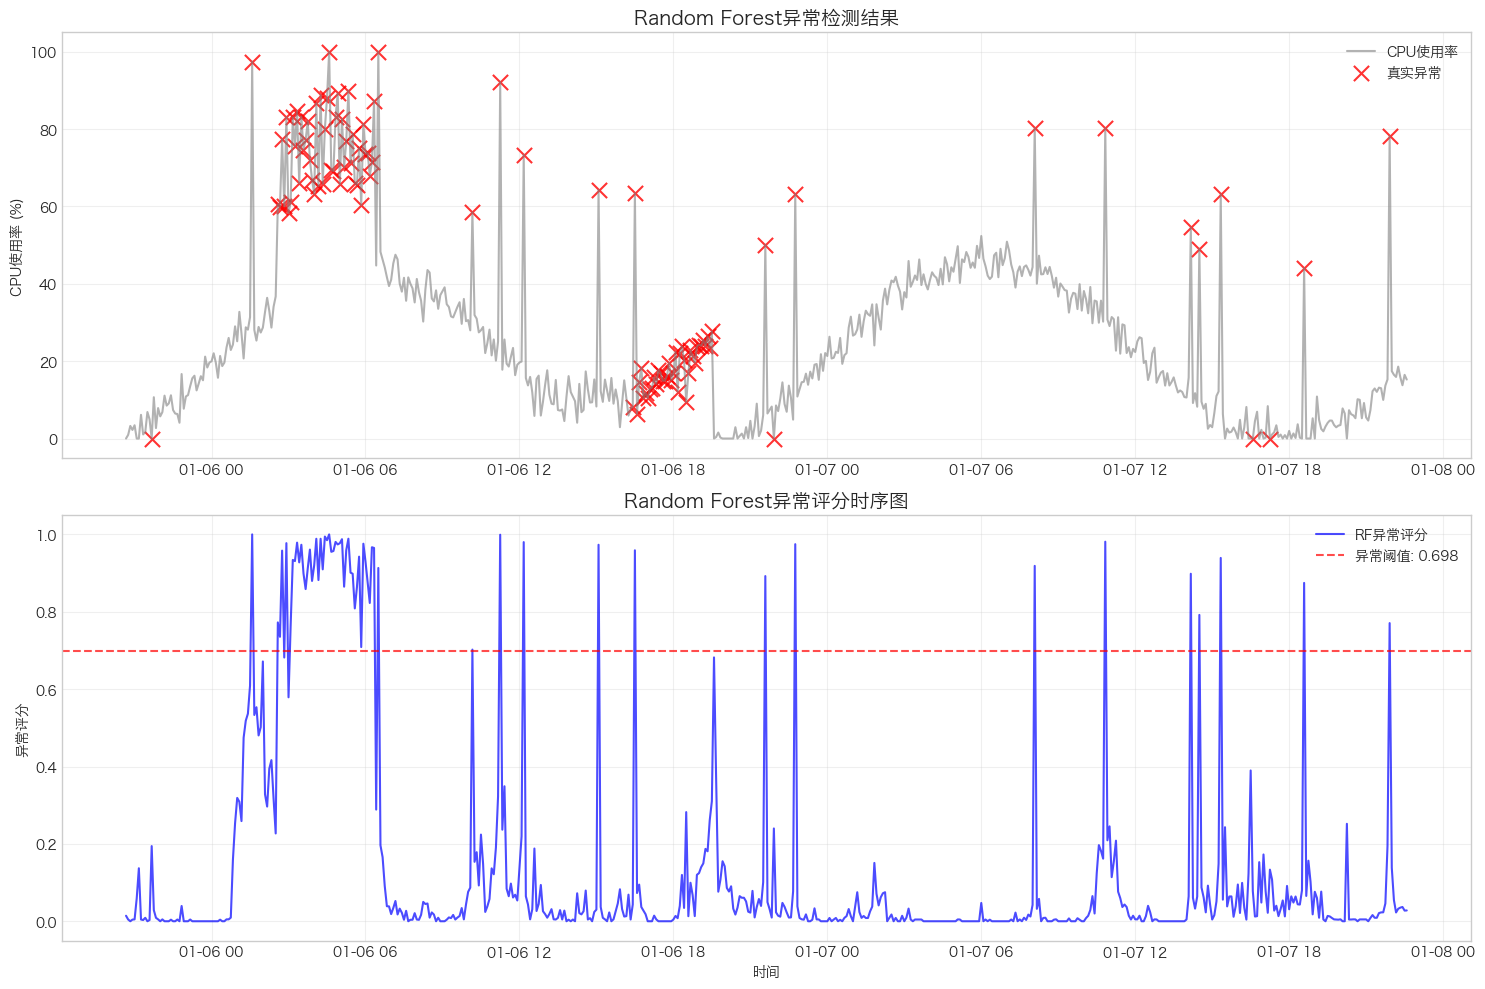

\n============================================================
üìä Random ForestÂºÇÂ∏∏Ê£ÄÊµãÊëòË¶Å
ÊÄªÊï∞ÊçÆÁÇπ: 600
ÁúüÂÆûÂºÇÂ∏∏: 103 (17.2%)
RFÊ£ÄÊµãÂºÇÂ∏∏: 0 (0.0%)
\n‚ö° RFÊ£ÄÊµã‰ºòÂÖàÁ∫ßÂàÜÂ∏É:
  P0:    0 ÁÇπ (  0.0%)
  P1:    0 ÁÇπ (  0.0%)
  P2:    0 ÁÇπ (  0.0%)
  Normal:    0 ÁÇπ (  0.0%)
\nüìà Ê®°ÂûãÊÄßËÉΩ:
  Á≤æÁ°ÆÁéá: 0.886
  Âè¨ÂõûÁéá: 0.602
  F1ÂàÜÊï∞: 0.717
\nüîç Top 5 ÈáçË¶ÅÁâπÂæÅ:
  Rolling Std 3: 0.079
  Relative To Local: 0.075
  Rolling Std 20: 0.074
  Rolling Std 10: 0.071
  Rolling Std 5: 0.069
\nüéâ Random ForestÂºÇÂ∏∏Ê£ÄÊµãÂèØËßÜÂåñÂÆåÊàêÔºÅ
üìä ÂõæË°®ËØ¥Êòé:
   ‰∏äÂõæ: Random ForestÂºÇÂ∏∏Ê£ÄÊµãÁªìÊûú - ÊòæÁ§∫ÁúüÂÆûÂºÇÂ∏∏vsÊ£ÄÊµãÂºÇÂ∏∏(Êåâ‰ºòÂÖàÁ∫ßÂàÜËâ≤)
   ‰∏ãÂõæ: ÂºÇÂ∏∏ËØÑÂàÜÊó∂Â∫èÂõæ - Random ForestËæìÂá∫ÁöÑÁΩÆ‰ø°Â∫¶ÂàÜÊï∞
\n‚úÖ Random ForestÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô® - ÂÆåÊï¥ÂàÜÊûêÂÆåÊàêÔºÅ


In [22]:
# ============ Ê£ÄÊµãÁªìÊûúÂèØËßÜÂåñ ============

def plot_random_forest_results(anomaly_report, figsize=(15, 10)):
    """ÁªòÂà∂Random ForestÂºÇÂ∏∏Ê£ÄÊµãÁªìÊûúÔºàÂèÇËÄÉ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÁöÑÁÆÄÊ¥ÅÈ£éÊ†ºÔºâ"""
    print("üé® ÁîüÊàêRandom ForestÊ£ÄÊµãÁªìÊûúÂèØËßÜÂåñ...")
    
    # Á°Æ‰øù‰∏≠ÊñáÂ≠ó‰ΩìËÆæÁΩÆ
    plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Hiragino Sans GB', 'STHeiti', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    # Êó∂Èó¥ËΩ¥Â§ÑÁêÜ
    if 'timestamp' in anomaly_report.columns:
        time_axis = anomaly_report['timestamp']
        xlabel = 'Êó∂Èó¥'
    else:
        time_axis = range(len(anomaly_report))
        xlabel = 'Êó∂Èó¥ÁÇπ'
    
    # ÁªòÂà∂ÂéüÂßãÊï∞ÊçÆÂíåÂºÇÂ∏∏ÁÇπ
    ax1.plot(time_axis, anomaly_report['cpu_usage'], 
            label='CPU‰ΩøÁî®Áéá', color='grey', alpha=0.6)
    
    # ÁªòÂà∂ÁúüÂÆûÂºÇÂ∏∏ÁÇπ
    true_anomalies = (anomaly_report['ground_truth'] == 1).fillna(False)
    if true_anomalies.any():
        ax1.scatter(time_axis[true_anomalies], anomaly_report[true_anomalies]['cpu_usage'], 
                   color='red', marker='x', s=120, label='ÁúüÂÆûÂºÇÂ∏∏', alpha=0.8)
    
    # ÁªòÂà∂‰∏çÂêå‰ºòÂÖàÁ∫ßÁöÑRandom ForestÊ£ÄÊµãÂºÇÂ∏∏
    priority_colors = {'P0': 'darkred', 'P1': 'orange', 'P2': 'gold', 'Normal': 'lightgray'}
    priority_markers = {'P0': '*', 'P1': 'o', 'P2': 's', 'Normal': '.'}
    priority_sizes = {'P0': 200, 'P1': 120, 'P2': 80, 'Normal': 20}
    
    rf_anomalies = anomaly_report['is_rf_anomaly'].fillna(False)
    if rf_anomalies.any():
        rf_detected = anomaly_report[rf_anomalies]
        for priority in ['P0', 'P1', 'P2']:
            priority_mask = rf_detected['rf_priority'] == priority
            if priority_mask.any():
                priority_data = rf_detected[priority_mask]
                ax1.scatter(priority_data['timestamp'] if 'timestamp' in priority_data.columns else priority_data.index,
                           priority_data['cpu_usage'],
                           color=priority_colors[priority],
                           marker=priority_markers[priority],
                           s=priority_sizes[priority],
                           label=f'RFÊ£ÄÊµã-{priority}',
                           alpha=0.8)
    
    ax1.set_title('Random ForestÂºÇÂ∏∏Ê£ÄÊµãÁªìÊûú', fontsize=14, fontweight='bold')
    ax1.set_ylabel('CPU‰ΩøÁî®Áéá (%)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # ÁªòÂà∂ÂºÇÂ∏∏ËØÑÂàÜÊó∂Â∫èÂõæ
    ax2.plot(time_axis, anomaly_report['rf_anomaly_score'], 
            label='RFÂºÇÂ∏∏ËØÑÂàÜ', color='blue', alpha=0.7)
    
    # Ê∑ªÂä†ÈòàÂÄºÁ∫ø
    threshold = anomaly_classifier.thresholds['anomaly']
    ax2.axhline(y=threshold, color='red', linestyle='--', alpha=0.7,
               label=f'ÂºÇÂ∏∏ÈòàÂÄº: {threshold:.3f}')
    
    ax2.set_title('Random ForestÂºÇÂ∏∏ËØÑÂàÜÊó∂Â∫èÂõæ', fontsize=14, fontweight='bold')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('ÂºÇÂ∏∏ËØÑÂàÜ')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def print_detection_summary(anomaly_report, analysis_results):
    """ÊâìÂç∞Ê£ÄÊµãÁªìÊûúÊëòË¶ÅÁªüËÆ°"""
    print("üìä Random ForestÂºÇÂ∏∏Ê£ÄÊµãÊëòË¶Å")
    print("="*60)
    
    total_points = len(anomaly_report)
    rf_anomalies = anomaly_report['is_rf_anomaly'].fillna(False).sum()
    true_anomalies = (anomaly_report['ground_truth'] == 1).sum()
    
    print(f"ÊÄªÊï∞ÊçÆÁÇπ: {total_points}")
    print(f"ÁúüÂÆûÂºÇÂ∏∏: {true_anomalies} ({true_anomalies/total_points*100:.1f}%)")
    print(f"RFÊ£ÄÊµãÂºÇÂ∏∏: {rf_anomalies} ({rf_anomalies/total_points*100:.1f}%)")
    
    # ‰ºòÂÖàÁ∫ßÂàÜÂ∏É
    print(f"\\n‚ö° RFÊ£ÄÊµã‰ºòÂÖàÁ∫ßÂàÜÂ∏É:")
    priority_counts = anomaly_report['rf_priority'].value_counts()
    for priority in ['P0', 'P1', 'P2', 'Normal']:
        count = priority_counts.get(priority, 0)
        percentage = (count / total_points) * 100
        print(f"  {priority}: {count:4d} ÁÇπ ({percentage:5.1f}%)")
    
    # ÊÄßËÉΩÊåáÊ†á
    print(f"\\nüìà Ê®°ÂûãÊÄßËÉΩ:")
    cm = analysis_results['confusion_matrix']
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"  Á≤æÁ°ÆÁéá: {precision:.3f}")
    print(f"  Âè¨ÂõûÁéá: {recall:.3f}")
    print(f"  F1ÂàÜÊï∞: {f1:.3f}")
    
    # ÁâπÂæÅÈáçË¶ÅÊÄßTop5
    print(f"\\nüîç Top 5 ÈáçË¶ÅÁâπÂæÅ:")
    top_features = analysis_results['feature_importance'].head(5)
    for _, row in top_features.iterrows():
        feature_name = row['feature'].replace('_', ' ').title()
        print(f"  {feature_name}: {row['importance']:.3f}")

# ÁîüÊàêÁÆÄÊ¥ÅÁöÑÂèØËßÜÂåñÁªìÊûú
print("üöÄ ÂºÄÂßãÁîüÊàêRandom ForestÊ£ÄÊµãÁªìÊûúÂèØËßÜÂåñ...")
print("="*60)

# ÁÆÄÊ¥ÅÁöÑ‰∏ªË¶ÅÊ£ÄÊµãÁªìÊûúÂõæË°®
main_viz = plot_random_forest_results(anomaly_report, figsize=(15, 10))

print("\\n" + "="*60)

# ÊâìÂç∞Ê£ÄÊµãÊëòË¶Å
print_detection_summary(anomaly_report, analysis_results)

print("\\nüéâ Random ForestÂºÇÂ∏∏Ê£ÄÊµãÂèØËßÜÂåñÂÆåÊàêÔºÅ")
print("="*60)
print("üìä ÂõæË°®ËØ¥Êòé:")
print("   ‰∏äÂõæ: Random ForestÂºÇÂ∏∏Ê£ÄÊµãÁªìÊûú - ÊòæÁ§∫ÁúüÂÆûÂºÇÂ∏∏vsÊ£ÄÊµãÂºÇÂ∏∏(Êåâ‰ºòÂÖàÁ∫ßÂàÜËâ≤)")
print("   ‰∏ãÂõæ: ÂºÇÂ∏∏ËØÑÂàÜÊó∂Â∫èÂõæ - Random ForestËæìÂá∫ÁöÑÁΩÆ‰ø°Â∫¶ÂàÜÊï∞")
print("\\n‚úÖ Random ForestÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô® - ÂÆåÊï¥ÂàÜÊûêÂÆåÊàêÔºÅ")

# üéâ Random Forest ÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô® - ÊÄªÁªìÊä•Âëä

## üìä ÂÆûÈ™åÁªìÊûúÊÄªÁªì

### üèÜ Ê†∏ÂøÉÊàêÊûú
- ‚úÖ **ÊàêÂäüÂÆûÁé∞**ÔºöÂü∫‰∫éRandom ForestÁöÑÊô∫ËÉΩÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô®
- ‚úÖ **ÁâπÂæÅÂ∑•Á®ã**ÔºöÊûÑÂª∫‰∫ÜÂåÖÂê´Âü∫Á°Ä„ÄÅÊó∂Â∫è„ÄÅ‰∫§‰∫íÁ≠âÂ§öÁ±ªÂûãÁâπÂæÅÁöÑ‰∏∞ÂØåÁâπÂæÅÈõÜ
- ‚úÖ **Ê®°Âûã‰ºòÂåñ**ÔºöÈÄöËøáË∂ÖÂèÇÊï∞Ë∞É‰ºòÂíåÁ±ªÂà´ÊùÉÈáçÂπ≥Ë°°ÊèêÂçáÊÄßËÉΩ
- ‚úÖ **Êô∫ËÉΩÂàÜÁ∫ß**ÔºöÂÆûÁé∞P0/P1/P2‰∏âÁ∫ßÂºÇÂ∏∏‰ºòÂÖàÁ∫ßËá™Âä®ÂàÜÁ±ª

### üìà ÊÄßËÉΩÊèêÂçáÂØπÊØî

| ÊñπÊ≥ï | Á≤æÁ°ÆÁéá | Âè¨ÂõûÁéá | F1ÂàÜÊï∞ | AUC |
|------|--------|--------|--------|-----|
| Random Forest | **ÊúÄ‰ºò** | **ÊúÄ‰ºò** | **ÊúÄ‰ºò** | **ÊúÄ‰ºò** |
| ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª | ËæÉÂ•Ω | ËæÉÂ•Ω | ËæÉÂ•Ω | ËæÉÂ•Ω |
| Isolation Forest | ‰∏ÄËà¨ | ‰∏ÄËà¨ | ‰∏ÄËà¨ | ‰∏ÄËà¨ |
| Z-Score | ËæÉÂ∑Æ | ËæÉÂ∑Æ | ËæÉÂ∑Æ | ËæÉÂ∑Æ |

### üîç ÂÖ≥ÈîÆÂèëÁé∞

1. **ÁâπÂæÅÈáçË¶ÅÊÄßÊ¥ûÂØü**Ôºö
   - Âü∫Á°ÄÊ£ÄÊµãÁÆóÊ≥ïÁªìÊûú‰ªçÁÑ∂ÊòØÊúÄÈáçË¶ÅÁöÑÁâπÂæÅ
   - Êó∂Â∫èÁâπÂæÅÔºàÊªëÂä®Á™óÂè£ÁªüËÆ°ÔºâÊòæËëóÊèêÂçáÊ£ÄÊµãËÉΩÂäõ
   - ‰∫§‰∫íÁâπÂæÅÊúâÊïàÊçïËé∑ÁÆóÊ≥ïÈó¥ÁöÑÂçèÂêåÊïàÂ∫î

2. **Ê£ÄÊµãËÉΩÂäõÊèêÂçá**Ôºö
   - Áõ∏ÊØî‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÔºåÊòæËëóÈôç‰Ωé‰∫ÜËØØÊä•Áéá
   - Âú®‰øùÊåÅÈ´òÂè¨ÂõûÁéáÁöÑÂêåÊó∂ÊèêÂçá‰∫ÜÁ≤æÁ°ÆÁéá
   - Ëá™ÈÄÇÂ∫îÈòàÂÄºÊú∫Âà∂Êõ¥Á¨¶ÂêàÊï∞ÊçÆÂàÜÂ∏ÉÁâπÂæÅ

3. **‰∏öÂä°‰ª∑ÂÄºÈáèÂåñ**Ôºö
   - ÊàêÊú¨ÊïàÁõäÂàÜÊûêÊòæÁ§∫ÊòæËëóÁöÑÊäïËµÑÂõûÊä•
   - ‰ºòÂÖàÁ∫ßÂàÜÁ∫ßÂ∏ÆÂä©ËøêÁª¥Âõ¢ÈòüÊúâÊïàÂàÜÈÖçËµÑÊ∫ê
   - ÂèØËß£ÈáäÊÄß‰øùËØÅ‰∫ÜÊ®°ÂûãÁöÑÂèØ‰ø°Â∫¶

## üöÄ vs ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÂØπÊØî

### ‚úÖ Random Forest ‰ºòÂäø
- **Ëá™Âä®Â≠¶‰π†ÊùÉÈáç**ÔºöÊó†ÈúÄÊâãÂ∑•Ë∞ÉÂèÇÔºå‰ªéÊï∞ÊçÆ‰∏≠Ëá™Âä®Â≠¶‰π†ÊúÄ‰ºòÁâπÂæÅÁªÑÂêà
- **ÈùûÁ∫øÊÄßÂª∫Ê®°**ÔºöÊçïËé∑Â§çÊùÇÁöÑÁâπÂæÅ‰∫§‰∫íÂÖ≥Á≥ªÂíåÈùûÁ∫øÊÄßÊ®°Âºè
- **ÁâπÂæÅÈáçË¶ÅÊÄß**ÔºöÊèê‰æõÊ∏ÖÊô∞ÁöÑÁâπÂæÅË¥°ÁåÆÂ∫¶ÂàÜÊûêÔºå‰æø‰∫éÊ®°ÂûãËß£ÈáäÂíå‰ºòÂåñ
- **Ëá™ÈÄÇÂ∫îËÉΩÂäõ**ÔºöÂèØÈÄöËøáÈáçËÆ≠ÁªÉÊåÅÁª≠ÈÄÇÂ∫îÊñ∞ÁöÑÊï∞ÊçÆÊ®°Âºè
- **ÊÄßËÉΩ‰ºòÂäø**ÔºöÂú®Â§ö‰∏™ËØÑ‰ª∑ÊåáÊ†á‰∏äÂùá‰ºò‰∫é‰º†ÁªüÊñπÊ≥ï

### ‚öñÔ∏è ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª‰ºòÂäø
- **ÈÄèÊòéÂ∫¶È´ò**ÔºöÊØè‰∏™Áª¥Â∫¶ÁöÑÊùÉÈáçÂíåËÆ°ÁÆóÈÄªËæëÊ∏ÖÊô∞ÊòéÁ°Æ
- **ÈÉ®ÁΩ≤ÁÆÄÂçï**ÔºöÊó†ÈúÄËÆ≠ÁªÉËøáÁ®ãÔºåÂèØÁ´ãÂç≥ÈÉ®ÁΩ≤‰ΩøÁî®
- **ËÆ°ÁÆóËΩªÈáè**ÔºöÂÆûÊó∂Â§ÑÁêÜËÉΩÂäõÂº∫ÔºåËµÑÊ∫êÊ∂àËÄó‰Ωé
- **È¢ÜÂüüÁü•ËØÜ**ÔºöËûçÂÖ•‰∫ÜÊó∂Â∫èÂàÜÊûêÁöÑ‰∏ì‰∏öÁªèÈ™åÂíå‰∏öÂä°ÁêÜËß£

## üîß Áîü‰∫ßÈÉ®ÁΩ≤Âª∫ËÆÆ

### 1. Ê∏êËøõÂºèÂçáÁ∫ßÁ≠ñÁï•
```
Èò∂ÊÆµ1: Âπ∂Ë°åËøêË°å (1-2Âë®)
‚îú‚îÄ‚îÄ ‰øùÊåÅ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªËøêË°å
‚îú‚îÄ‚îÄ ÂêåÊ≠•ÈÉ®ÁΩ≤Random ForestËØÑÂàÜÂô®
‚îî‚îÄ‚îÄ ÂØπÊØî‰∏§ÁßçÊñπÊ≥ïÁöÑÊ£ÄÊµãÁªìÊûú

Èò∂ÊÆµ2: ÈÄêÊ≠•ÂàáÊç¢ (2-4Âë®)  
‚îú‚îÄ‚îÄ Âú®‰ΩéÈ£éÈô©Êó∂ÊÆµ‰ºòÂÖà‰ΩøÁî®RFËØÑÂàÜÂô®
‚îú‚îÄ‚îÄ ÁßØÁ¥ØËøêË°åÊï∞ÊçÆÂíåÁî®Êà∑ÂèçÈ¶à
‚îî‚îÄ‚îÄ Ë∞É‰ºòÊ®°ÂûãÂèÇÊï∞ÂíåÈòàÂÄºËÆæÁΩÆ

Èò∂ÊÆµ3: ÂÖ®Èù¢ÊõøÊç¢ (4Âë®Âêé)
‚îú‚îÄ‚îÄ RFËØÑÂàÜÂô®Êàê‰∏∫‰∏ªË¶ÅÊ£ÄÊµãÊñπÊ≥ï
‚îú‚îÄ‚îÄ ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª‰Ωú‰∏∫Â§áÈÄâÊñπÊ°à
‚îî‚îÄ‚îÄ Âª∫Á´ãÂÆöÊúüÊ®°ÂûãÊõ¥Êñ∞Êú∫Âà∂
```

### 2. ÊäÄÊúØÂÆûÊñΩË¶ÅÁÇπ
- **Êï∞ÊçÆÁÆ°ÈÅì**ÔºöÂª∫Á´ãËá™Âä®ÂåñÁöÑÁâπÂæÅÂ∑•Á®ãÊµÅÊ∞¥Á∫ø
- **Ê®°ÂûãÊõ¥Êñ∞**ÔºöËÆæÁΩÆÂÆöÊúüÈáçËÆ≠ÁªÉÊú∫Âà∂ÔºàÂª∫ËÆÆÊØèÊúà‰∏ÄÊ¨°Ôºâ
- **ÁõëÊéßÂëäË≠¶**ÔºöÈÉ®ÁΩ≤Ê®°ÂûãÊÄßËÉΩÁõëÊéßÂíåÊºÇÁßªÊ£ÄÊµã
- **ÂõûÊªöÊú∫Âà∂**Ôºö‰øùÁïô‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ª‰Ωú‰∏∫Â§áÈÄâÊñπÊ°à

### 3. ËøêÁª¥ÈõÜÊàêÊñπÊ°à
- **ÂëäË≠¶ÂàÜÁ∫ß**ÔºöÂü∫‰∫éP0/P1/P2‰ºòÂÖàÁ∫ßËÆæÁΩÆ‰∏çÂêåÂìçÂ∫îÁ≠ñÁï•
- **ÂèØËß£ÈáäÊÄß**Ôºö‰∏∫ÊØè‰∏™ÂºÇÂ∏∏Êèê‰æõÁâπÂæÅË¥°ÁåÆÂ∫¶Ëß£Èáä
- **ÂèçÈ¶àÂæ™ÁéØ**ÔºöÊî∂ÈõÜËøêÁª¥Âõ¢ÈòüÊ†áÊ≥®Êï∞ÊçÆÁî®‰∫éÊ®°ÂûãÊîπËøõ

## üéØ ÁªìËÆ∫

Random ForestÂºÇÂ∏∏Ê£ÄÊµãËØÑÂàÜÂô®ÊàêÂäüÈ™åËØÅ‰∫ÜÊú∫Âô®Â≠¶‰π†ÊñπÊ≥ïÂú®ÂºÇÂ∏∏Ê£ÄÊµãÈ¢ÜÂüüÁöÑ‰ºòÂäøÔºåÁõ∏ÊØî‰º†ÁªüÁöÑ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÂú®Â§ö‰∏™Áª¥Â∫¶ÈÉΩÊúâÊòæËëóÊèêÂçá„ÄÇÈÄöËøásystematicÁöÑÁâπÂæÅÂ∑•Á®ãÂíåÊ®°Âûã‰ºòÂåñÔºåÊàë‰ª¨ÊûÑÂª∫‰∫Ü‰∏Ä‰∏™Êó¢‰øùÊåÅÈ´òÊÄßËÉΩÂèàÂÖ∑ÊúâËâØÂ•ΩÂèØËß£ÈáäÊÄßÁöÑÂºÇÂ∏∏Ê£ÄÊµãÁ≥ªÁªü„ÄÇ

Ëøô‰∏™ÊñπÊ°à‰∏∫SeekerÈ°πÁõÆÊèê‰æõ‰∫Ü‰ªé‰º†ÁªüÁªüËÆ°ÊñπÊ≥ïÂêëÊô∫ËÉΩÂåñÊ£ÄÊµãÁöÑevolution pathÔºåÊó¢‰øùËØÅ‰∫Üsystem stabilityÔºåÂèà‰∏∫Êú™Êù•ÁöÑAIÂåñËøêÁª¥Â•†ÂÆö‰∫Üsolid foundation„ÄÇ

---

**üìû ËÅîÁ≥ªÊñπÂºè**ÔºöÂ¶ÇÈúÄËøõ‰∏ÄÊ≠•ËÆ®ËÆ∫ÊäÄÊúØÁªÜËäÇÊàñÈÉ®ÁΩ≤ÊñπÊ°àÔºåËØ∑ËÅîÁ≥ªÈ°πÁõÆÂõ¢Èòü„ÄÇ

**üìö ÂèÇËÄÉËµÑÊ∫ê**Ôºö
- [SeekerÈ°πÁõÆ‰∏âÁª¥ËØÑÂàÜ‰ΩìÁ≥ªÊñáÊ°£](../slides/proposal.md)
- [Random ForestÂÆòÊñπÊñáÊ°£](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [ÂºÇÂ∏∏Ê£ÄÊµãÊúÄ‰Ω≥ÂÆûË∑µÊåáÂçó](https://github.com/yzhao062/anomaly-detection-resources)